In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib
import os
from sklearn.preprocessing import LabelEncoder

In [279]:
df1 = pd.read_csv("RentPrediction-Dataset.csv")
pd.set_option("display.max_columns", None)
df1

,Unnamed: 0,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,0,denton,Elan Denton,1 - 3,1 - 2.5,"630 - 1,404",4.2,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,1,"1,621 - 2,420"
1,1,denton,Eighteen 51 Brinker,1 - 3,1 - 2,"700 - 1,350",4.0,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,0,1,1,0,1,1,"1,499 - 2,499"
2,2,denton,Epic Apartments,1 - 3,1 - 2,"633 - 1,180",3.0,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,1,"1,275 - 1,735"
3,3,denton,Epoch on Eagle,Studio - 2,1 - 2,"507 - 1,177",4.0,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,0,1,1,1,0,1,"1,350 - 2,479"
4,4,denton,Allora Denton,1 - 2,1 - 2,"850 - 1,317",?,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,0,1,0,1,"1,380 - 2,020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,967,dallas,Muse,Studio - 3,1 - 2,"247 - 1,374",3.7,"3035 W Pentagon Pky,\r\n Dallas...",1,1,1,0,0,0,0,0,0,"763 - 2,296"
968,968,dallas,The Glen at Highpoint,1 - 2,1 - 2,"600 - 1,094",3.3,"9050 Markville Dr,\r\n Dallas,\...",0,1,1,0,0,0,1,0,0,"835 - 1,527"
969,969,dallas,Enclave At Prestonwood,1 - 2,1 - 2,480 - 944,4.0,"5930 Arapaho Rd,\r\n Dallas,\r\...",1,1,1,0,0,1,1,0,0,"925 - 1,937"
970,970,dallas,Oakwood Place Apartment Homes,1 - 3,1,"625 - 1,000",3.9,"4950 Wadsworth Dr,\r\n Dallas,\...",1,0,0,0,0,0,0,0,0,790 - 999


In [280]:
df2= pd.read_csv("RentPrediction-Dataset2.csv")
pd.set_option("display.max_columns", None)
df2

,Unnamed: 0,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,0,denton,Eighteen 51 Brinker,1-3,?,"700-1,350",3.2857142857142856,"1851 Brinker Rd, Denton, TX 76208",1,1,1,?,1,1,1,1,1,"1,449-2,499"
1,1,denton,Elan Denton,1-3,?,"630-1,404",3.142857142857143,"1501 Northstar Rd, Denton, TX 76208",1,1,1,?,1,1,0,1,1,"1,534-2,420"
2,2,denton,Epic Apartments,1-3,?,"633-1,180",3.5714285714285716,"3200 S Interstate 35 E, Denton, TX 76210",0,1,1,?,1,1,0,1,1,"1,240-1,350"
3,3,denton,Epoch on Eagle,Studio-2,?,"507-1,177",3.4285714285714284,"903 Avenue C, Denton, TX 76201",1,1,1,?,1,1,0,0,1,"1,350-2,479"
4,4,denton,32hundred Windsor,1-2,?,"812-1,185",3.0,"3200 W Windsor Dr, Denton, TX 76207",0,1,1,?,0,1,0,0,1,"1,395-2,970"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,2047,dallas,Camino Del Sol Apartment Homes,1-2,?,565-981,3.2,"1030 Dallas Dr, Denton, TX 76205",0,1,1,?,0,1,1,0,0,"1,040-1,907"
2048,2048,dallas,Preserve at Pecan Creek,1-3,?,"738-1,319",3.0,"6303 W Shady Shores Rd, Denton, TX 76208",0,1,0,?,0,1,1,0,0,"1,209-2,149"
2049,2049,dallas,Pecan Creek on McKinney Apartments,2-4,?,"950-1,300",3.1666666666666665,"3500 E McKinney Denton St, Denton, TX 76209",1,1,0,?,0,1,1,0,1,"1,283-1,473"
2050,2050,dallas,Greenway Patio,1-3,?,"711-1,260",3.1666666666666665,"2912 Augusta Dr, Denton, TX 76207",1,1,0,?,1,1,1,0,0,"1,695-1,780"


In [281]:
df=df1.append(df2)

C:\Users\dy0119\AppData\Local\Temp\ipykernel_6216\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [282]:
df=df.drop(['Unnamed: 0'], axis=1)

In [283]:
for feature in df.columns:
    print(feature)
    print(df[feature].dtypes)
    print(len(df[feature].unique()))

City
object
2
Names
object
2140
Bed
object
30
Bath
object
22
Area
object
2581
Rating
object
49
location
object
2889
petsallowed
object
3
pool
object
3
fitnessCenter
object
3
gated
object
3
grill
object
3
closet
object
3
washerdryer
object
3
countertops
object
3
access
object
3
Rent
object
2601


In [284]:
df.isnull()

,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2048,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2049,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2050,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [285]:
for col in df:
    print(col,list(df[col].unique()))

City ['denton', 'dallas']
Names ['Elan Denton', 'Eighteen 51 Brinker', 'Epic Apartments', 'Epoch on Eagle', 'Allora Denton', 'Discovery Park Apartments', 'Sunstone Village a 55+ Active Adult Cottages', '32hundred Windsor', 'Majestic Parc Apartments', 'Timberlinks At Denton', 'The Venue', 'Pecan Grove Apartments', 'Urban Square', 'Hickory Creek Ranch', 'The Residences at Rayzor Ranch', 'Fountains of Denton', 'The Vista at Rayzor Ranch', 'Eureka Village - Free Internet & Cable', 'Beall Way', 'Gardens of Denton', 'Oak Meadows Apartments', 'UC Denton Student Housing', 'Cooper Denton', 'Village at Rayzor Ranch', 'The Village Residences', 'The Mark At Denton', 'Woodlands of Denton', 'Lana Apartments', 'East End Lofts at the Railyard', 'Longhorn Cove Townhomes', 'The Lodge at Pecan Creek', 'Greenway Patio', 'Paces Crossing', 'Quincy Court', 'Sequoia Park Apartments', 'Camino Del Sol Apartment Homes', 'WatersEdge Denton Apartments', 'Square9 Apartment Homes', 'Canopy at South Lakes', 'The Pear

In [286]:
df = df.replace('?', np.nan)
df = df.replace('nan', np.nan)
df = df.replace('Call for Rent', np.nan)
df = df.replace('Contact for Rates', np.nan)

In [287]:
df.isnull().sum()*100/len(df)

City              0.000000
Names             0.000000
Bed               5.687831
Bath             67.890212
Area              5.886243
Rating           15.013228
location          0.000000
petsallowed      12.599206
pool              5.853175
fitnessCenter     5.853175
gated            70.601852
grill             5.853175
closet            5.853175
washerdryer       5.853175
countertops       5.853175
access            5.853175
Rent              6.878307
dtype: float64

In [288]:
cols=["Bed","Bath","Area","Rent"]
for a in cols:
    print(a)
    df[a] = df[a].apply(lambda x: str(x).replace('-',"")if 'Studio'in str(x) else x)
    df[a] = df[a].apply(lambda x: str(x).replace(" ","")if 'Studio'in str(x) else x)
    df[a] = df[a].apply(lambda x: str(x).split("-"))
    df[a] = df[a].apply(lambda x: x[1].strip(" ") if len(x)==2 else x[0])
    
  

Bed
Bath
Area
Rent


In [289]:
df

,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,denton,Elan Denton,3,2.5,"1,404",4.2,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,1,"2,420"
1,denton,Eighteen 51 Brinker,3,2,"1,350",4.0,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,0,1,1,0,1,1,"2,499"
2,denton,Epic Apartments,3,2,"1,180",3.0,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,1,"1,735"
3,denton,Epoch on Eagle,Studio2,2,"1,177",4.0,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,0,1,1,1,0,1,"2,479"
4,denton,Allora Denton,2,2,"1,317",NaN,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,0,1,0,1,"2,020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,dallas,Camino Del Sol Apartment Homes,2,nan,981,3.2,"1030 Dallas Dr, Denton, TX 76205",0,1,1,NaN,0,1,1,0,0,"1,907"
2048,dallas,Preserve at Pecan Creek,3,nan,"1,319",3.0,"6303 W Shady Shores Rd, Denton, TX 76208",0,1,0,NaN,0,1,1,0,0,"2,149"
2049,dallas,Pecan Creek on McKinney Apartments,4,nan,"1,300",3.1666666666666665,"3500 E McKinney Denton St, Denton, TX 76209",1,1,0,NaN,0,1,1,0,1,"1,473"
2050,dallas,Greenway Patio,3,nan,"1,260",3.1666666666666665,"2912 Augusta Dr, Denton, TX 76207",1,1,0,NaN,1,1,1,0,0,"1,780"


In [290]:
for col in df:
    print(col,list(df[col].unique()))

City ['denton', 'dallas']
Names ['Elan Denton', 'Eighteen 51 Brinker', 'Epic Apartments', 'Epoch on Eagle', 'Allora Denton', 'Discovery Park Apartments', 'Sunstone Village a 55+ Active Adult Cottages', '32hundred Windsor', 'Majestic Parc Apartments', 'Timberlinks At Denton', 'The Venue', 'Pecan Grove Apartments', 'Urban Square', 'Hickory Creek Ranch', 'The Residences at Rayzor Ranch', 'Fountains of Denton', 'The Vista at Rayzor Ranch', 'Eureka Village - Free Internet & Cable', 'Beall Way', 'Gardens of Denton', 'Oak Meadows Apartments', 'UC Denton Student Housing', 'Cooper Denton', 'Village at Rayzor Ranch', 'The Village Residences', 'The Mark At Denton', 'Woodlands of Denton', 'Lana Apartments', 'East End Lofts at the Railyard', 'Longhorn Cove Townhomes', 'The Lodge at Pecan Creek', 'Greenway Patio', 'Paces Crossing', 'Quincy Court', 'Sequoia Park Apartments', 'Camino Del Sol Apartment Homes', 'WatersEdge Denton Apartments', 'Square9 Apartment Homes', 'Canopy at South Lakes', 'The Pear

In [291]:
for feature in df.columns:
    print(feature)
    print(df[feature].dtypes)
    print(len(df[feature].unique()))

City
object
2
Names
object
2140
Bed
object
16
Bath
object
17
Area
object
1037
Rating
object
48
location
object
2889
petsallowed
object
3
pool
object
3
fitnessCenter
object
3
gated
object
3
grill
object
3
closet
object
3
washerdryer
object
3
countertops
object
3
access
object
3
Rent
object
1536


In [292]:
cols=["Area","Rent"]
for a in cols:
    print(a)
    df[a] = df[a].apply(lambda x: str(x).replace(',',""))
    
df

Area
Rent


,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,denton,Elan Denton,3,2.5,1404,4.2,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,1,2420
1,denton,Eighteen 51 Brinker,3,2,1350,4.0,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,0,1,1,0,1,1,2499
2,denton,Epic Apartments,3,2,1180,3.0,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,1,1735
3,denton,Epoch on Eagle,Studio2,2,1177,4.0,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,0,1,1,1,0,1,2479
4,denton,Allora Denton,2,2,1317,NaN,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,0,1,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,dallas,Camino Del Sol Apartment Homes,2,nan,981,3.2,"1030 Dallas Dr, Denton, TX 76205",0,1,1,NaN,0,1,1,0,0,1907
2048,dallas,Preserve at Pecan Creek,3,nan,1319,3.0,"6303 W Shady Shores Rd, Denton, TX 76208",0,1,0,NaN,0,1,1,0,0,2149
2049,dallas,Pecan Creek on McKinney Apartments,4,nan,1300,3.1666666666666665,"3500 E McKinney Denton St, Denton, TX 76209",1,1,0,NaN,0,1,1,0,1,1473
2050,dallas,Greenway Patio,3,nan,1260,3.1666666666666665,"2912 Augusta Dr, Denton, TX 76207",1,1,0,NaN,1,1,1,0,0,1780


In [295]:
data_types_dict = {'Bath':float,'Area':float,'Rating':float,'Rent':float}
df = df.astype(data_types_dict)
df.dtypes

City              object
Names             object
Bed               object
Bath             float64
Area             float64
Rating           float64
location          object
petsallowed       object
pool              object
fitnessCenter     object
gated             object
grill             object
closet            object
washerdryer       object
countertops       object
access            object
Rent             float64
dtype: object

In [296]:
numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 4
Discrete feature Count 1
Continuous feature Count 3
Categorical feature Count 13


In [297]:
print("Numerical features:",numerical_feature)
print("discrete_features:",discrete_feature)
print("continuous_features:",continuous_feature)
print("categorical_features:",categorical_feature)

Numerical features: ['Bath', 'Area', 'Rating', 'Rent']
discrete_features: ['Bath']
continuous_features: ['Area', 'Rating', 'Rent']
categorical_features: ['City', 'Names', 'Bed', 'location', 'petsallowed', 'pool', 'fitnessCenter', 'gated', 'grill', 'closet', 'washerdryer', 'countertops', 'access']


In [299]:
df.isnull().sum()*100/len(df)

City              0.000000
Names             0.000000
Bed               0.000000
Bath             67.890212
Area              5.886243
Rating           15.013228
location          0.000000
petsallowed      12.599206
pool              5.853175
fitnessCenter     5.853175
gated            70.601852
grill             5.853175
closet            5.853175
washerdryer       5.853175
countertops       5.853175
access            5.853175
Rent              6.878307
dtype: float64

In [303]:
df=df.drop(['gated'], axis=1)
df=df.drop(['Bath'], axis=1)

In [304]:
df

,City,Names,Bed,Area,Rating,location,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,denton,Elan Denton,3,1404.0,4.200000,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,2420.0
1,denton,Eighteen 51 Brinker,3,1350.0,4.000000,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,1,1,0,1,1,2499.0
2,denton,Epic Apartments,3,1180.0,3.000000,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,1735.0
3,denton,Epoch on Eagle,Studio2,1177.0,4.000000,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,1,1,1,0,1,2479.0
4,denton,Allora Denton,2,1317.0,NaN,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,1,0,1,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,dallas,Camino Del Sol Apartment Homes,2,981.0,3.200000,"1030 Dallas Dr, Denton, TX 76205",0,1,1,0,1,1,0,0,1907.0
2048,dallas,Preserve at Pecan Creek,3,1319.0,3.000000,"6303 W Shady Shores Rd, Denton, TX 76208",0,1,0,0,1,1,0,0,2149.0
2049,dallas,Pecan Creek on McKinney Apartments,4,1300.0,3.166667,"3500 E McKinney Denton St, Denton, TX 76209",1,1,0,0,1,1,0,1,1473.0
2050,dallas,Greenway Patio,3,1260.0,3.166667,"2912 Augusta Dr, Denton, TX 76207",1,1,0,1,1,1,0,0,1780.0


In [306]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Area")
mode_nan(df,"Rating")
mode_nan(df,"petsallowed")
mode_nan(df,"pool")
mode_nan(df,"fitnessCenter")
mode_nan(df,"grill")
mode_nan(df,"closet")
mode_nan(df,"washerdryer")
mode_nan(df,"countertops")
mode_nan(df,"access")
mode_nan(df,"fitnessCenter")
mode_nan(df,"Rent")


In [307]:
df.isnull().sum()*100/len(df)

City             0.0
Names            0.0
Bed              0.0
Area             0.0
Rating           0.0
location         0.0
petsallowed      0.0
pool             0.0
fitnessCenter    0.0
grill            0.0
closet           0.0
washerdryer      0.0
countertops      0.0
access           0.0
Rent             0.0
dtype: float64

In [313]:
numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
print("Numerical features:",numerical_feature)
print("discrete_features:",discrete_feature)
print("continuous_features:",continuous_feature)
print("categorical_features:",categorical_feature)

Numerical Features Count 3
Discrete feature Count 0
Continuous feature Count 3
Categorical feature Count 12
Numerical features: ['Area', 'Rating', 'Rent']
discrete_features: []
continuous_features: ['Area', 'Rating', 'Rent']
categorical_features: ['City', 'Names', 'Bed', 'location', 'petsallowed', 'pool', 'fitnessCenter', 'grill', 'closet', 'washerdryer', 'countertops', 'access']


In [315]:
labelencoder = LabelEncoder()
for feature in categorical_feature:
    df[feature] = labelencoder.fit_transform(df[feature])

In [316]:
df

,City,Names,Bed,Area,Rating,location,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,1,729,3,1404.0,4.200000,448,1,1,1,1,1,1,1,1,2420.0
1,1,726,3,1350.0,4.000000,647,1,1,1,1,1,0,1,1,2499.0
2,1,753,3,1180.0,3.000000,1361,1,1,1,1,1,1,1,1,1735.0
3,1,754,12,1177.0,4.000000,2736,1,1,1,1,1,1,0,1,2479.0
4,1,362,1,1317.0,3.000000,1239,1,1,1,0,0,1,0,1,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,0,550,1,981.0,3.200000,77,0,1,1,0,1,1,0,0,1907.0
2048,0,1326,3,1319.0,3.000000,2320,0,1,0,0,1,1,0,0,2149.0
2049,0,1302,5,1300.0,3.166667,1466,1,1,0,0,1,1,0,1,1473.0
2050,0,864,3,1260.0,3.166667,1225,1,1,0,1,1,1,0,0,1780.0


In [317]:
for col in df:
    print(col,list(df[col].unique()))

City [1, 0]
Names [729, 726, 753, 754, 362, 693, 1537, 177, 1113, 1964, 1875, 1303, 2009, 894, 1837, 801, 1903, 769, 452, 833, 1213, 2001, 618, 2038, 1893, 1786, 2126, 1002, 712, 1047, 1765, 864, 1261, 1353, 1454, 550, 2074, 1510, 552, 1817, 1407, 1095, 46, 345, 1326, 405, 382, 68, 616, 1226, 925, 1302, 799, 2059, 1388, 623, 1826, 1516, 2005, 643, 71, 543, 914, 1277, 1163, 1525, 2054, 907, 216, 1991, 797, 2004, 1046, 484, 621, 1665, 1658, 908, 1771, 2123, 2071, 741, 516, 610, 1322, 1648, 10, 210, 87, 312, 205, 62, 141, 204, 294, 285, 192, 128, 23, 65, 92, 127, 279, 16, 302, 35, 185, 278, 305, 97, 13, 265, 238, 298, 24, 286, 96, 313, 194, 173, 165, 140, 189, 166, 132, 111, 112, 242, 6, 237, 121, 287, 262, 86, 264, 119, 137, 187, 76, 51, 306, 250, 159, 75, 198, 311, 120, 267, 273, 20, 19, 183, 219, 224, 200, 36, 243, 202, 295, 317, 146, 85, 296, 203, 191, 38, 258, 21, 15, 84, 163, 145, 251, 276, 14, 301, 261, 25, 9, 288, 321, 199, 60, 66, 72, 314, 186, 100, 135, 131, 214, 103, 129, 33, 2

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


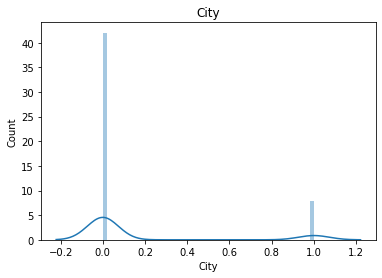

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


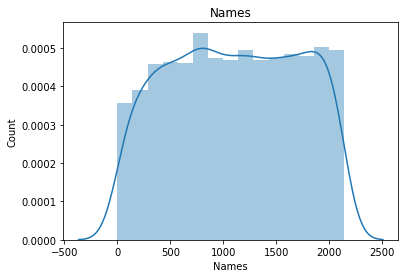

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


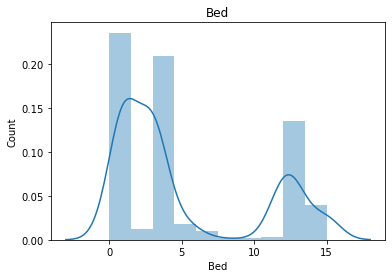

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


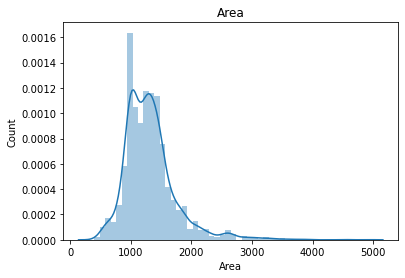

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


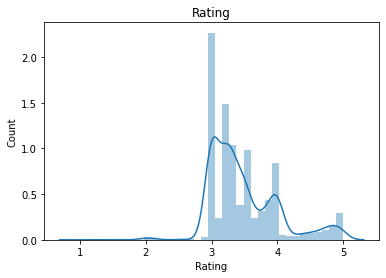

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


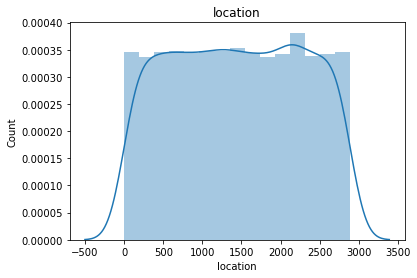

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


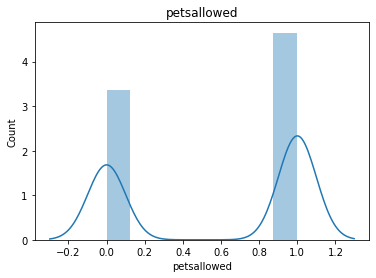

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


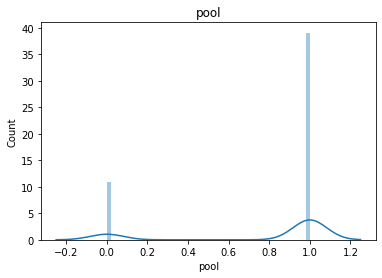

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


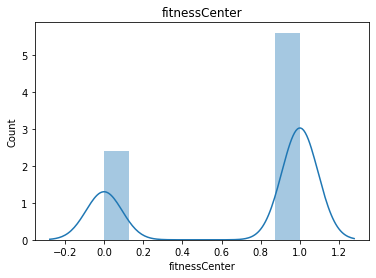

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


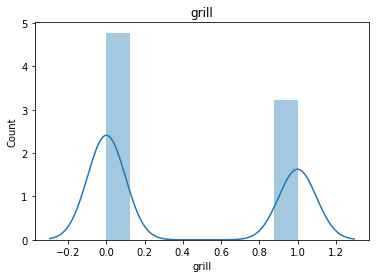

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


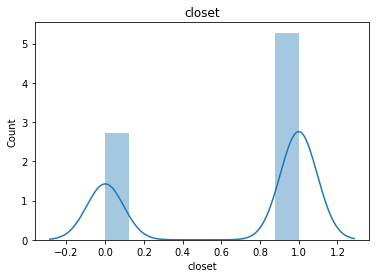

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


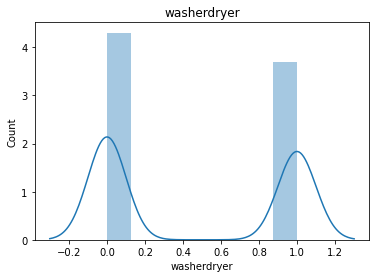

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


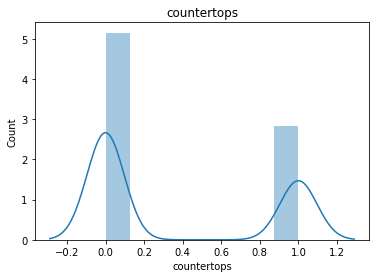

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


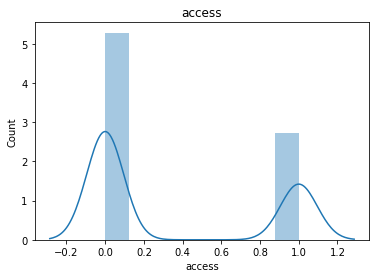

<Figure size 1080x1080 with 0 Axes>

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


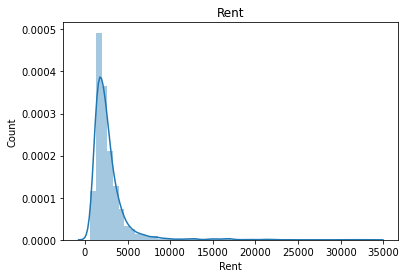

<Figure size 1080x1080 with 0 Axes>

In [320]:
for feature in df:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda

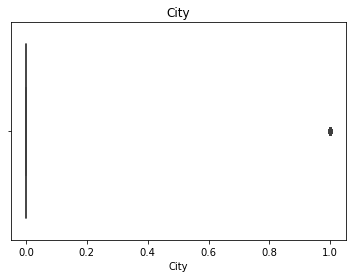

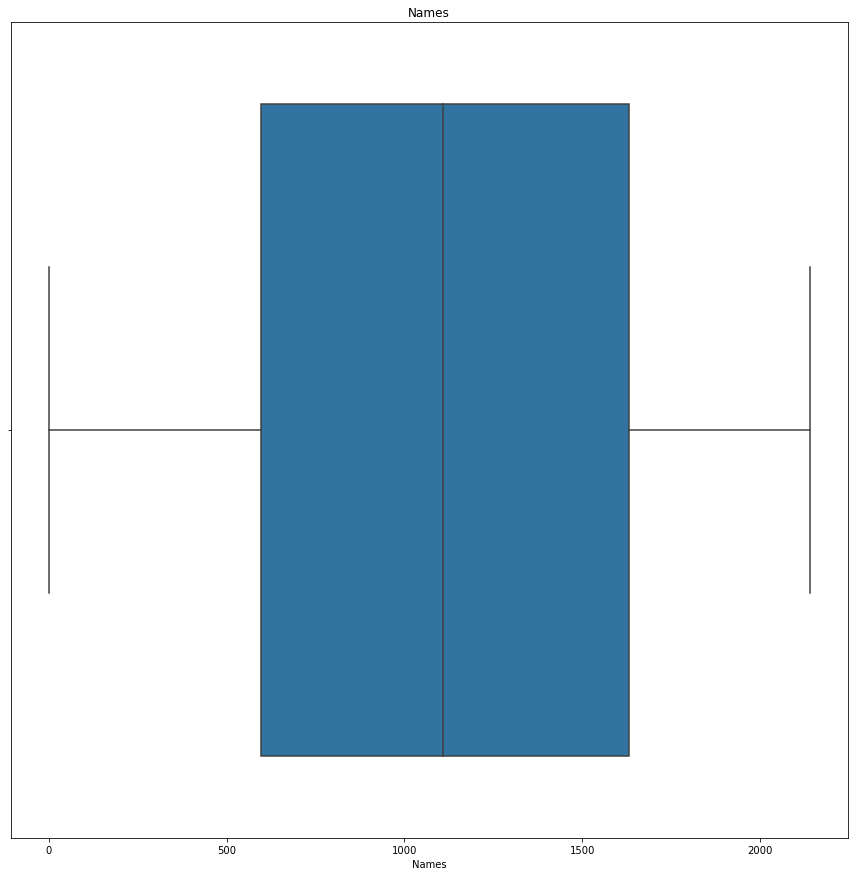

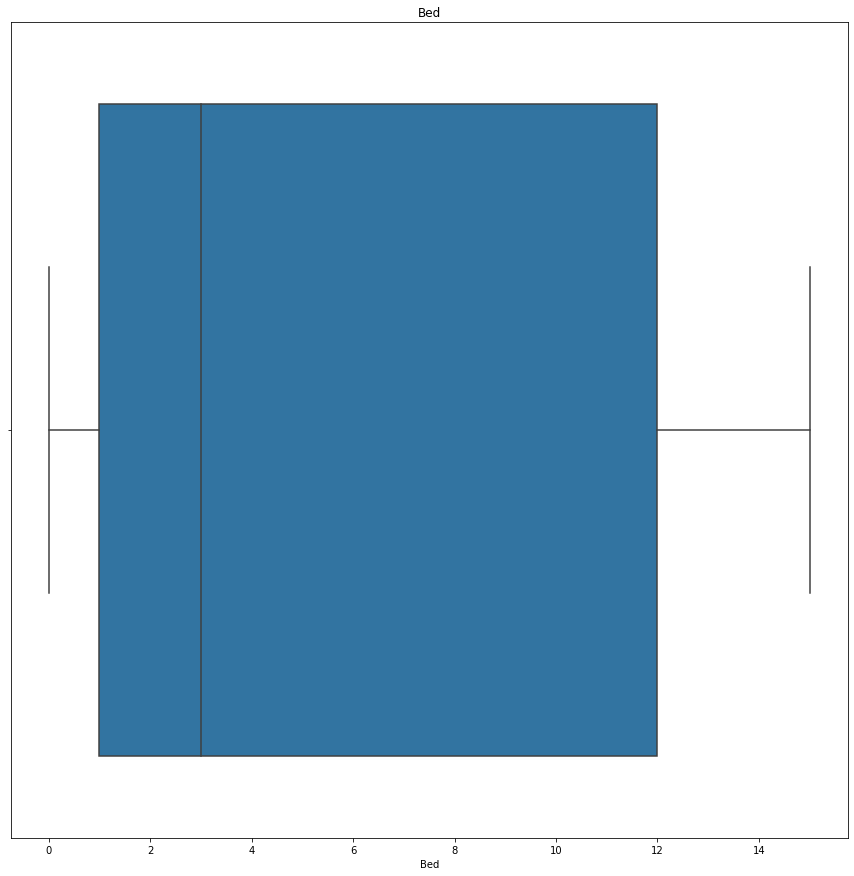

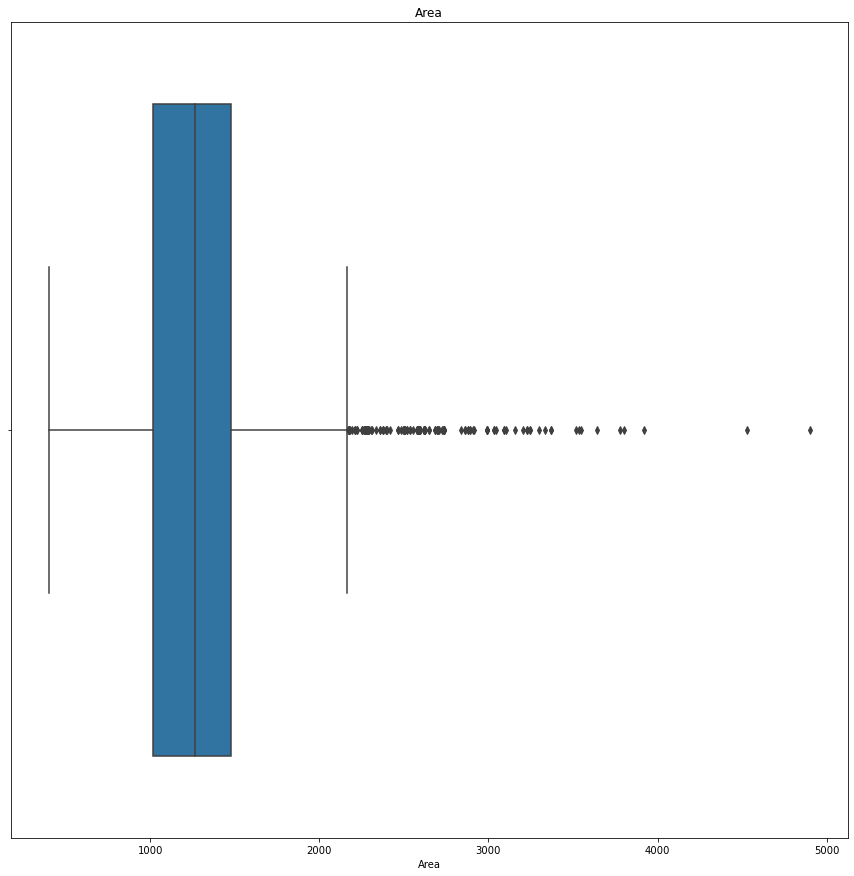

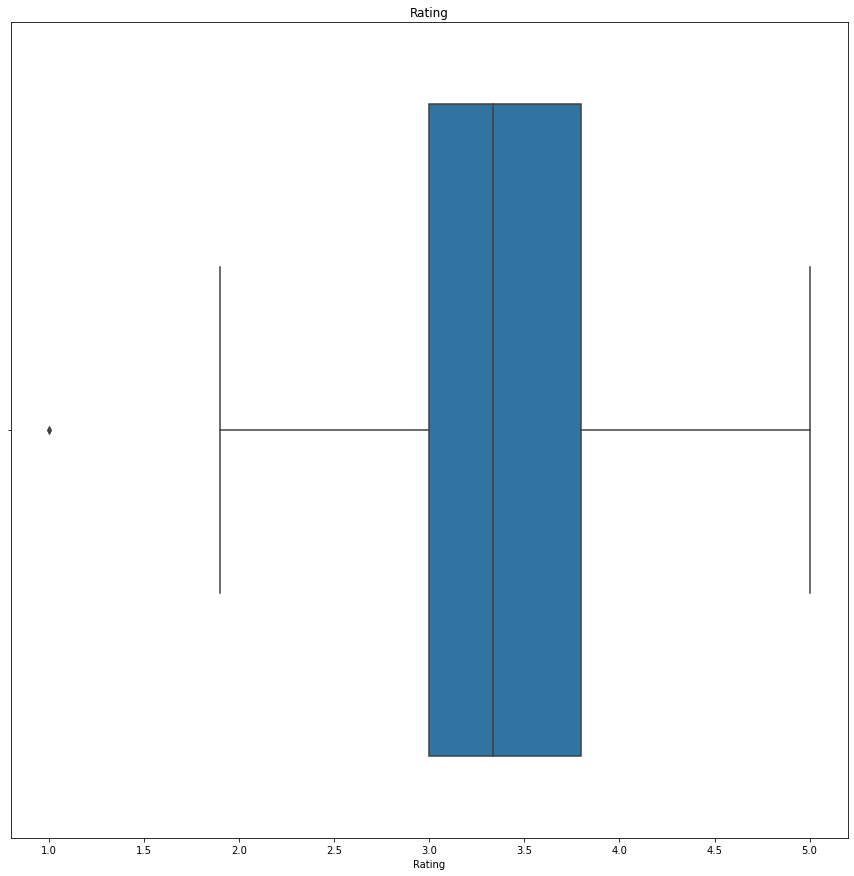

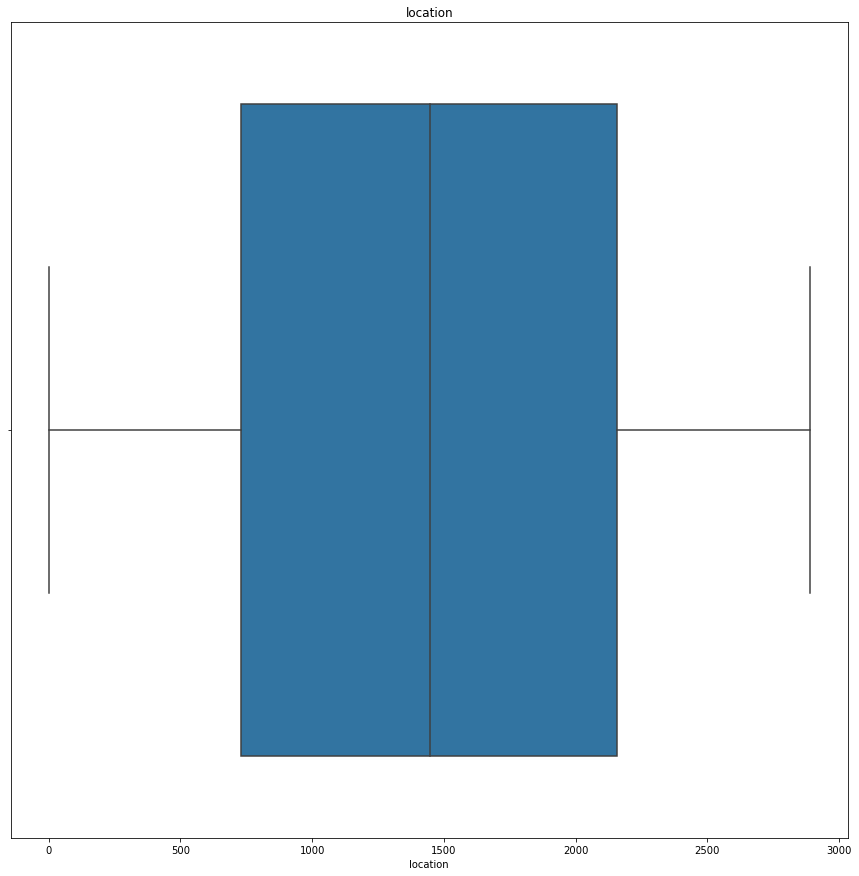

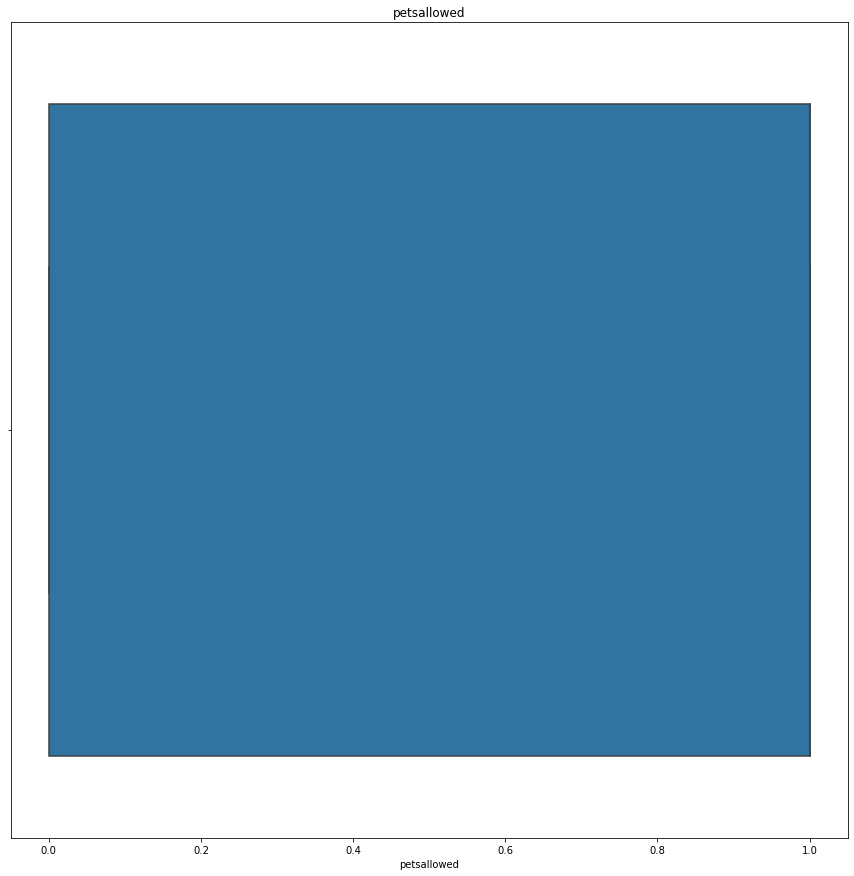

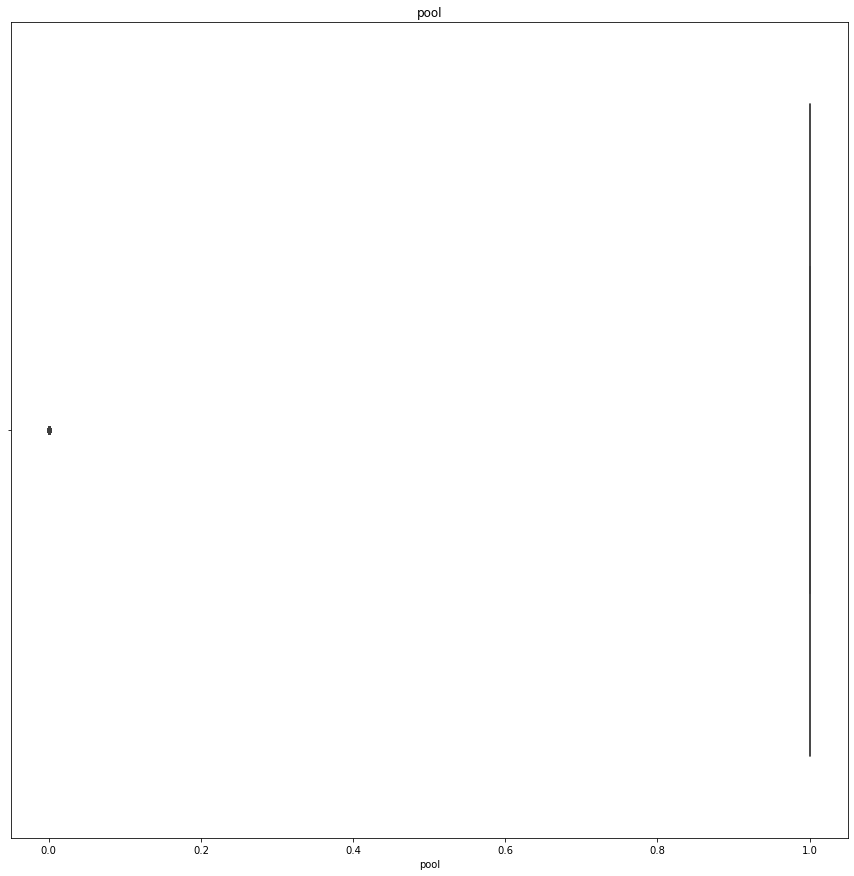

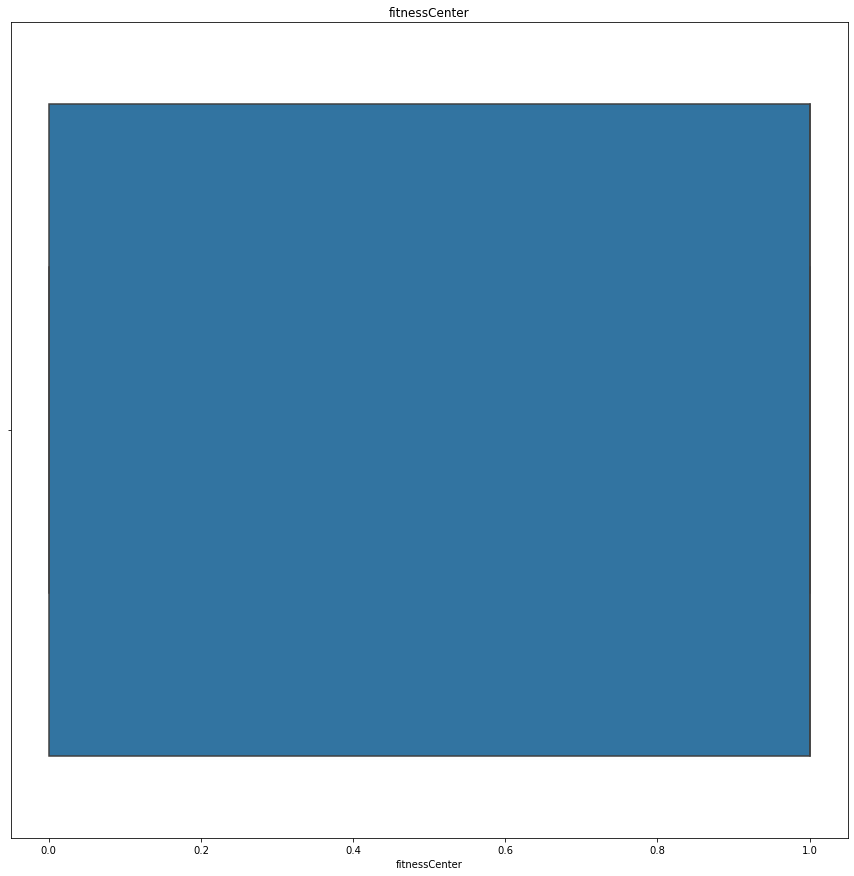

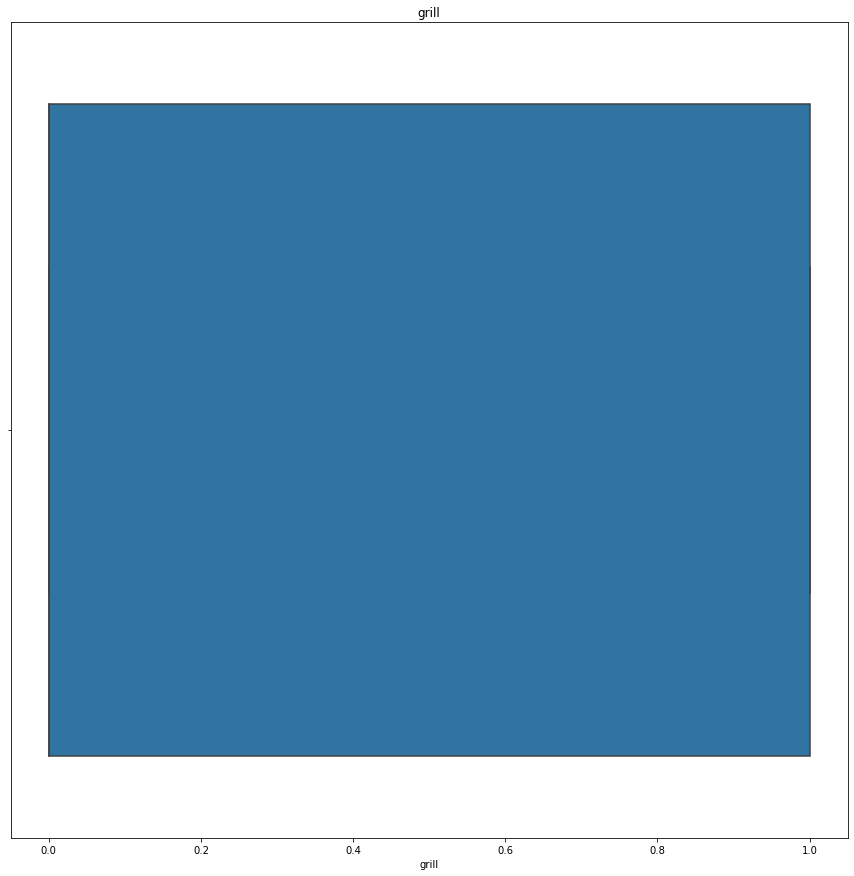

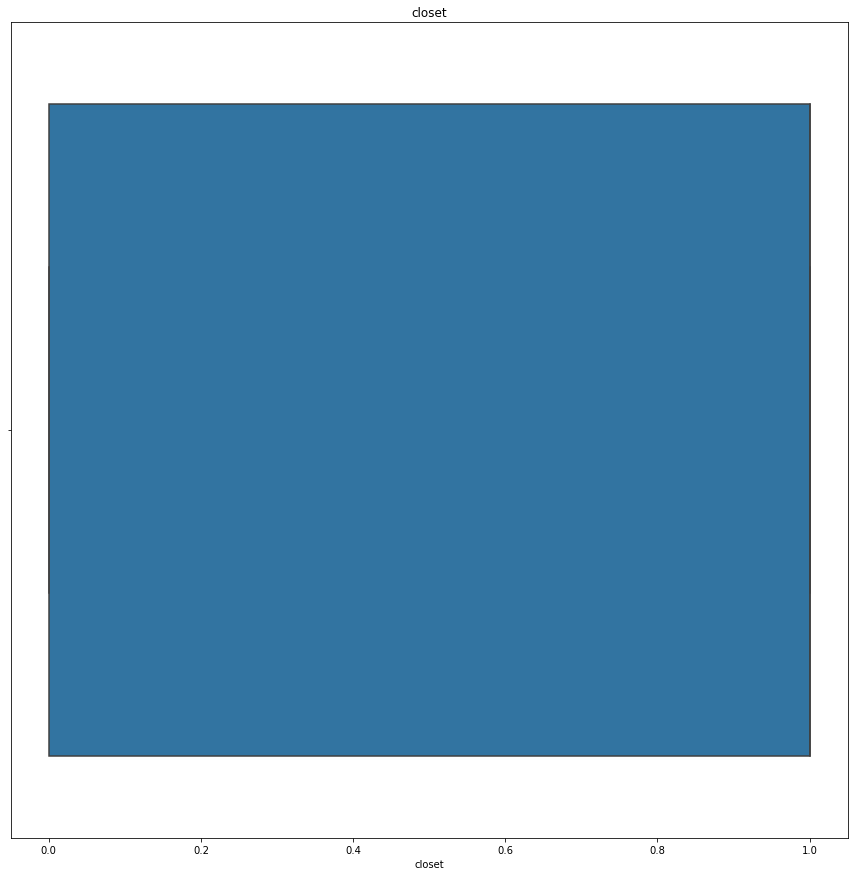

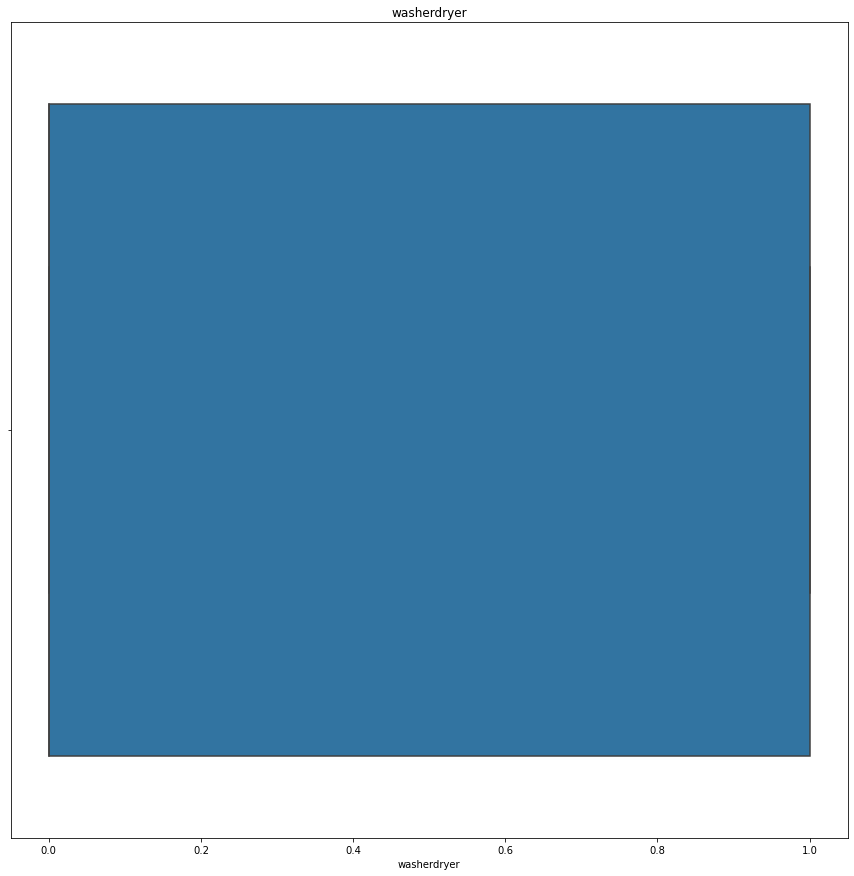

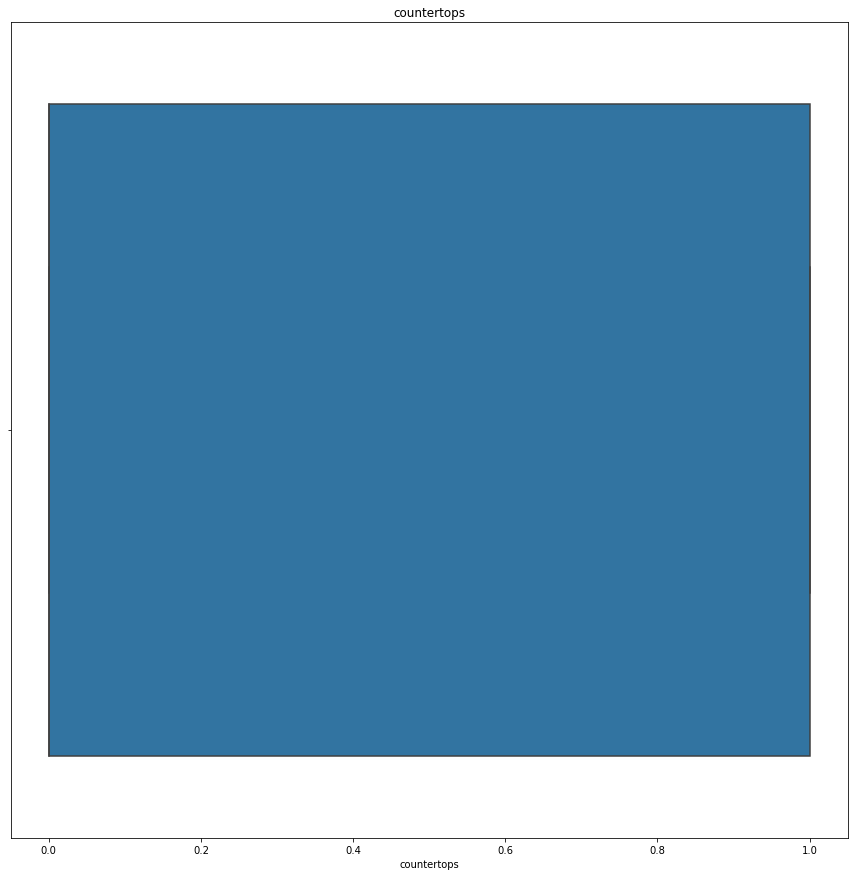

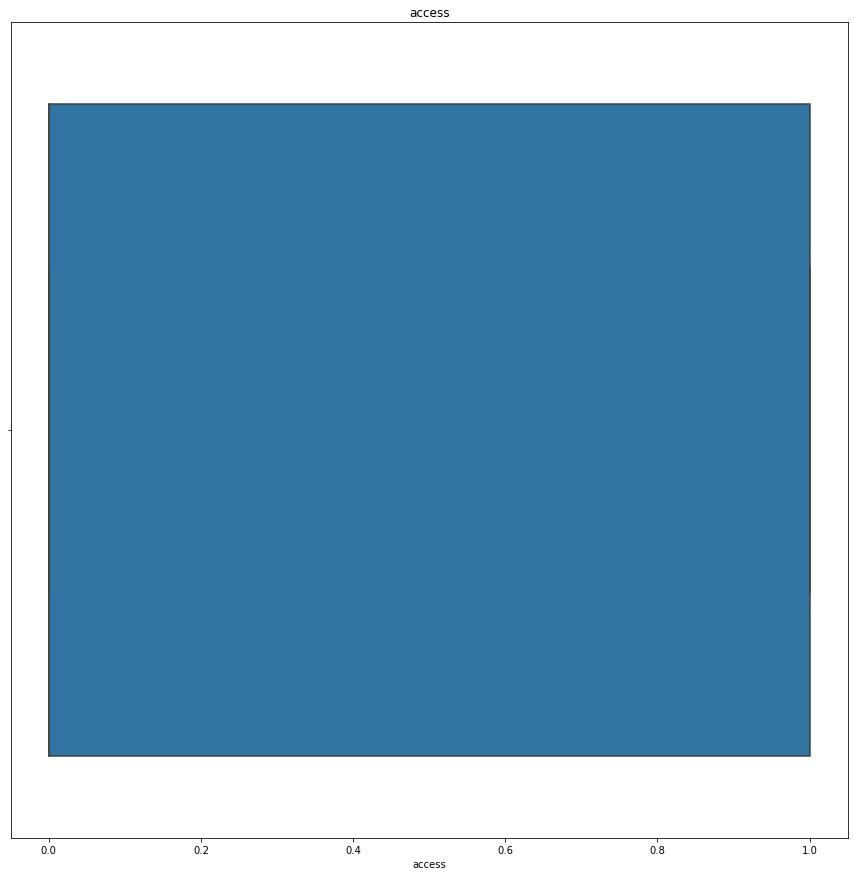

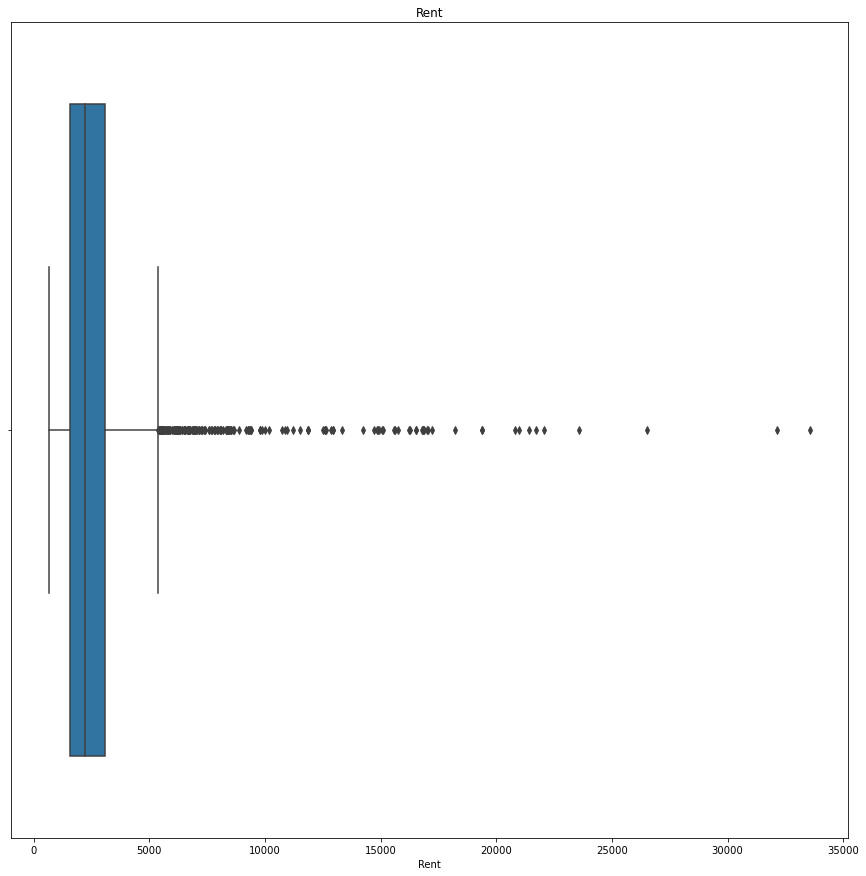

<Figure size 1080x1080 with 0 Axes>

In [321]:
for feature in df:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [322]:
def removeoutlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
    print(lower_bridge, upper_bridge)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [323]:
for feature in df:
    print(feature)
    removeoutlier(df,feature)

City
0.0 0.0
Names
-956.875 3184.125
Bed
-15.5 28.5
Area
328.0 2168.0
Rating
1.8000000000000003 5.0
location
-1411.0 4295.0
petsallowed
-1.5 2.5
pool
1.0 1.0
fitnessCenter
-1.5 2.5
grill
-1.5 2.5
closet
-1.5 2.5
washerdryer
-1.5 2.5
countertops
-1.5 2.5
access
-1.5 2.5
Rent
-694.0 5370.0


In [324]:
df

,City,Names,Bed,Area,Rating,location,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,0,729.0,3.0,1404.0,4.200000,448,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,2420.0
1,0,726.0,3.0,1350.0,4.000000,647,1.0,1,1.0,1.0,1.0,0.0,1.0,1.0,2499.0
2,0,753.0,3.0,1180.0,3.000000,1361,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1735.0
3,0,754.0,12.0,1177.0,4.000000,2736,1.0,1,1.0,1.0,1.0,1.0,0.0,1.0,2479.0
4,0,362.0,1.0,1317.0,3.000000,1239,1.0,1,1.0,0.0,0.0,1.0,0.0,1.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,0,550.0,1.0,981.0,3.200000,77,0.0,1,1.0,0.0,1.0,1.0,0.0,0.0,1907.0
2048,0,1326.0,3.0,1319.0,3.000000,2320,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,2149.0
2049,0,1302.0,5.0,1300.0,3.166667,1466,1.0,1,0.0,0.0,1.0,1.0,0.0,1.0,1473.0
2050,0,864.0,3.0,1260.0,3.166667,1225,1.0,1,0.0,1.0,1.0,1.0,0.0,0.0,1780.0


C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Anaconda

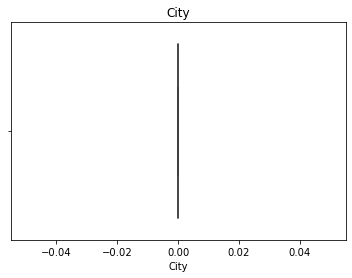

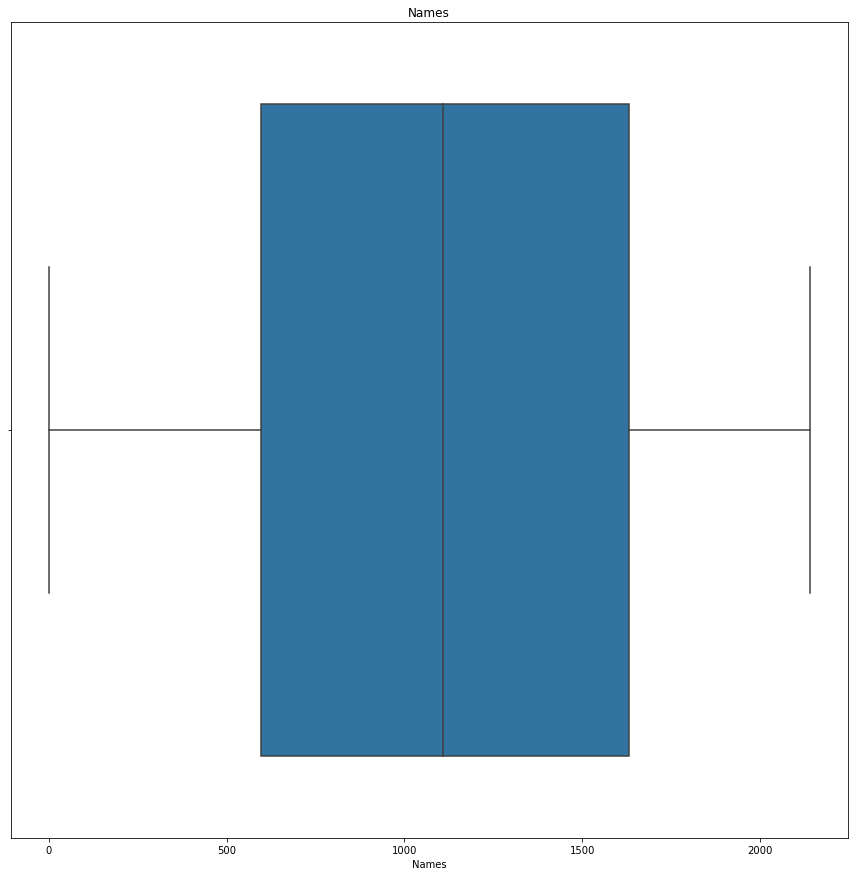

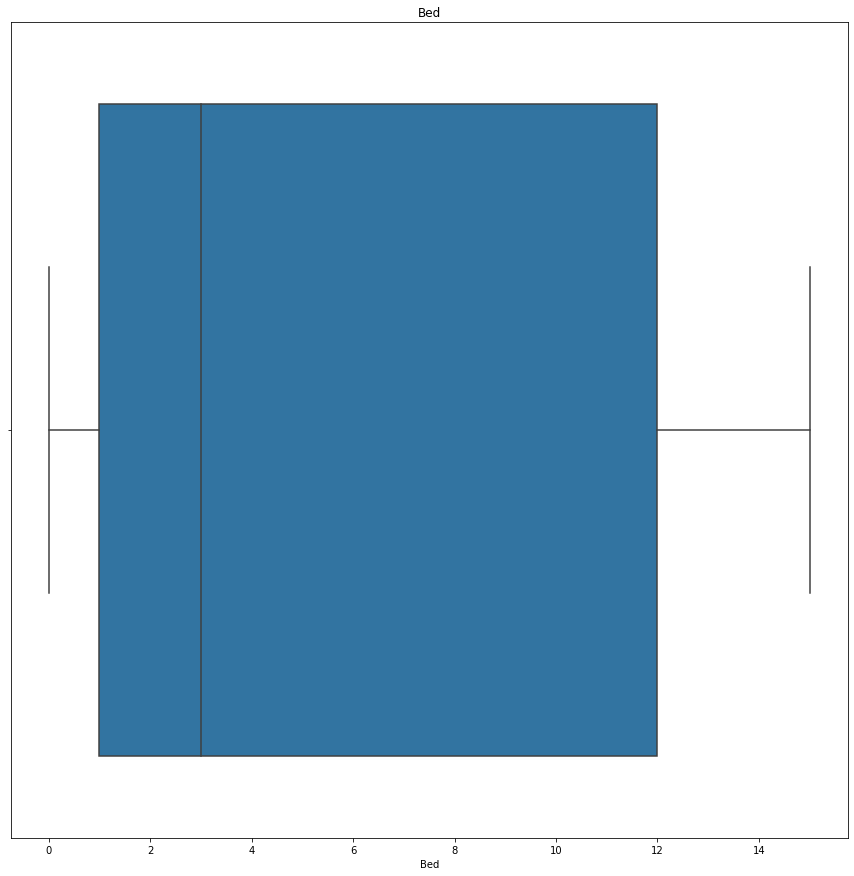

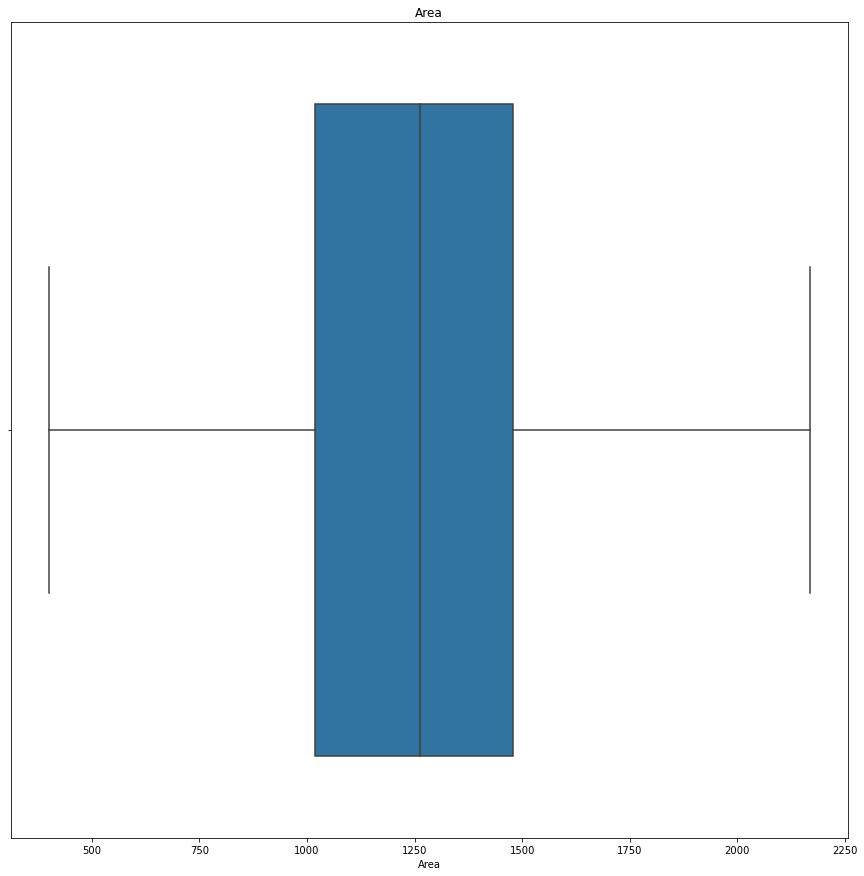

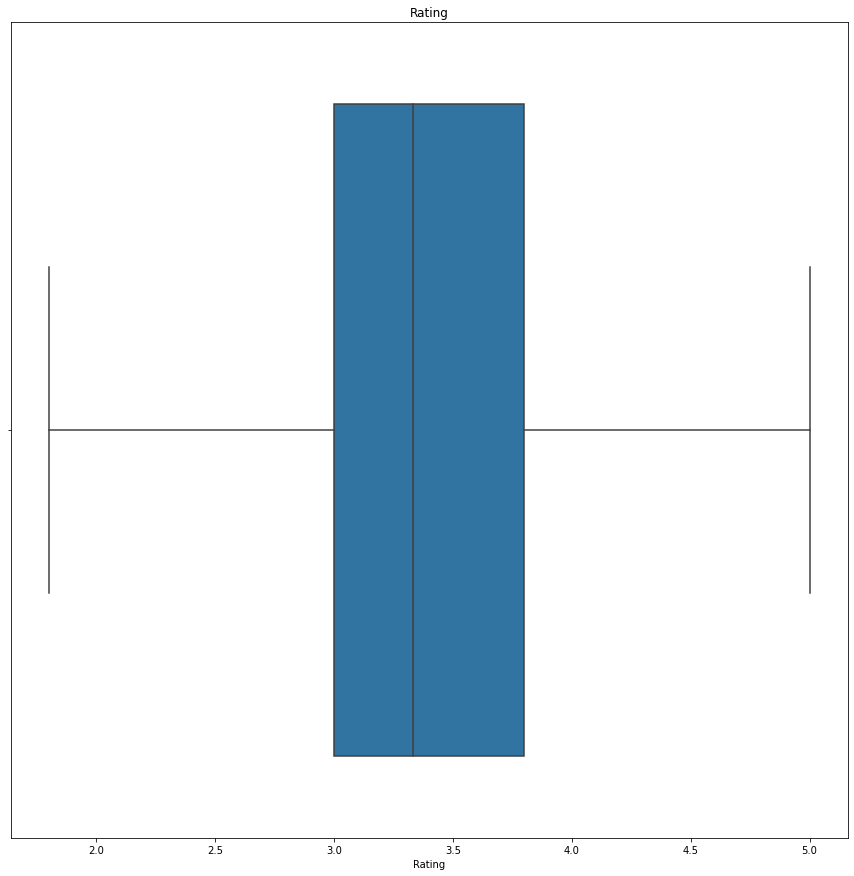

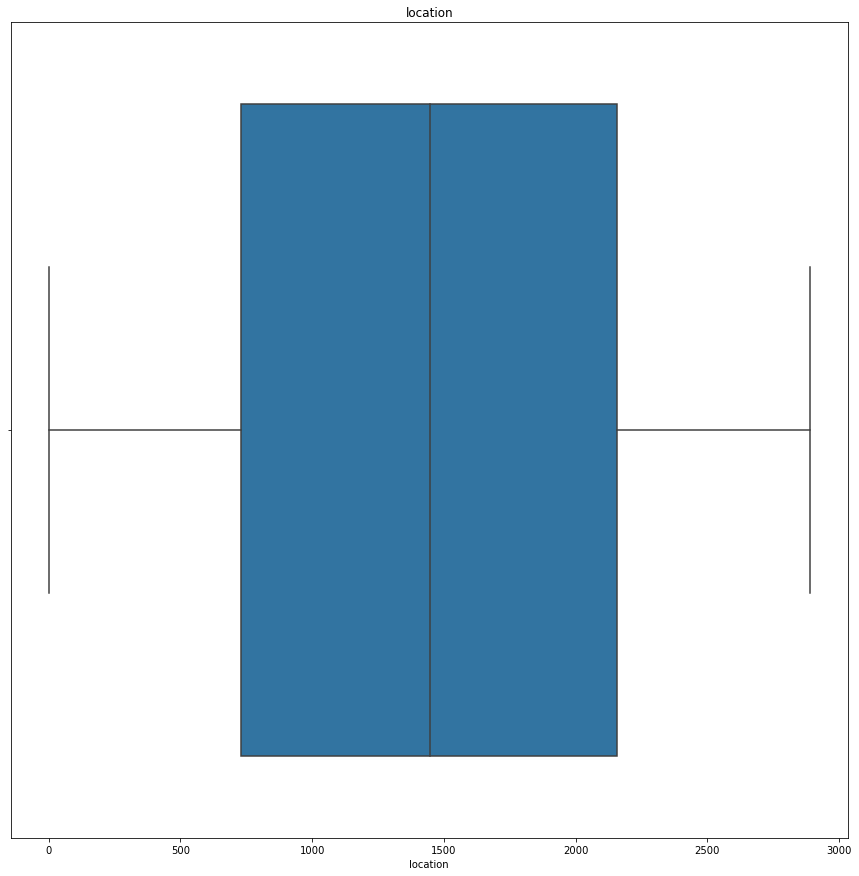

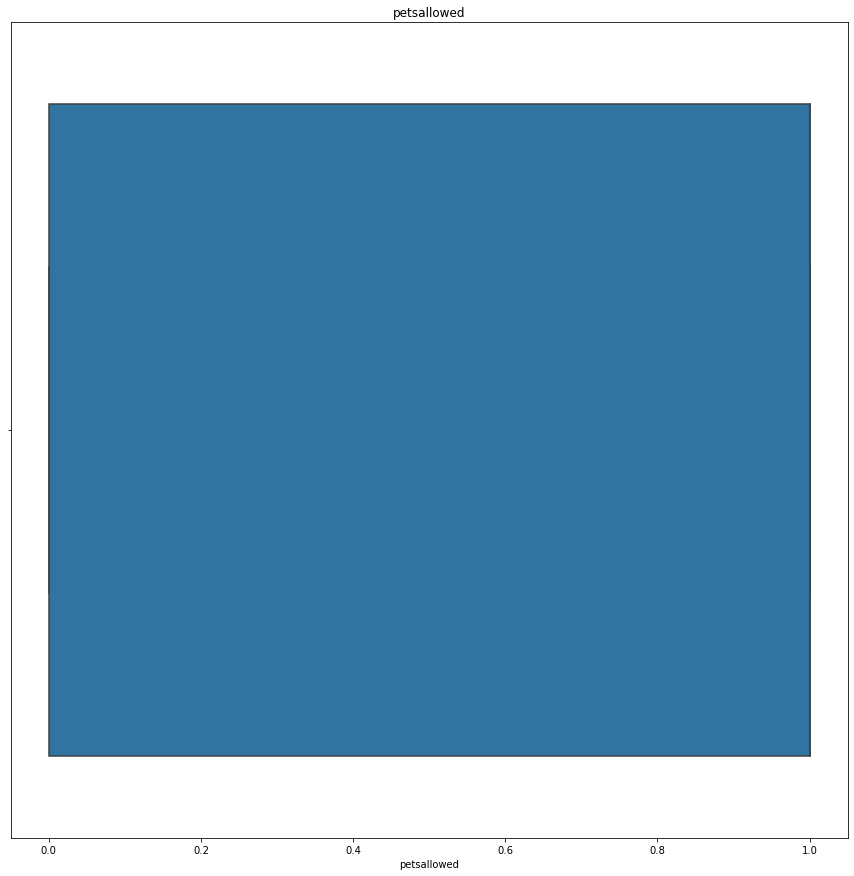

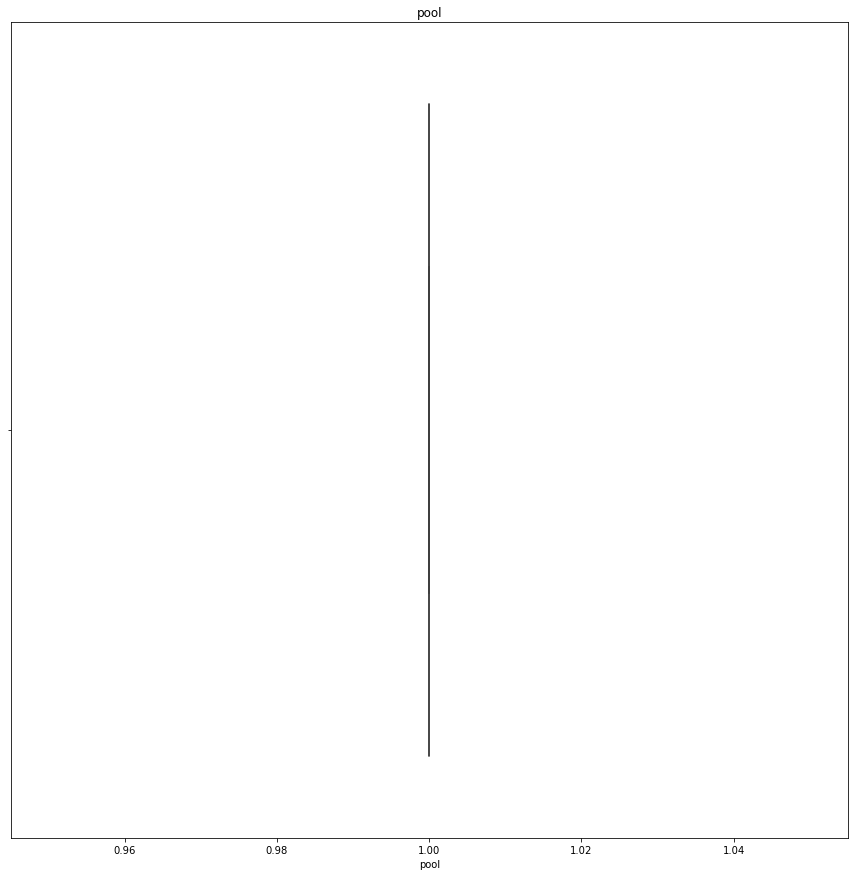

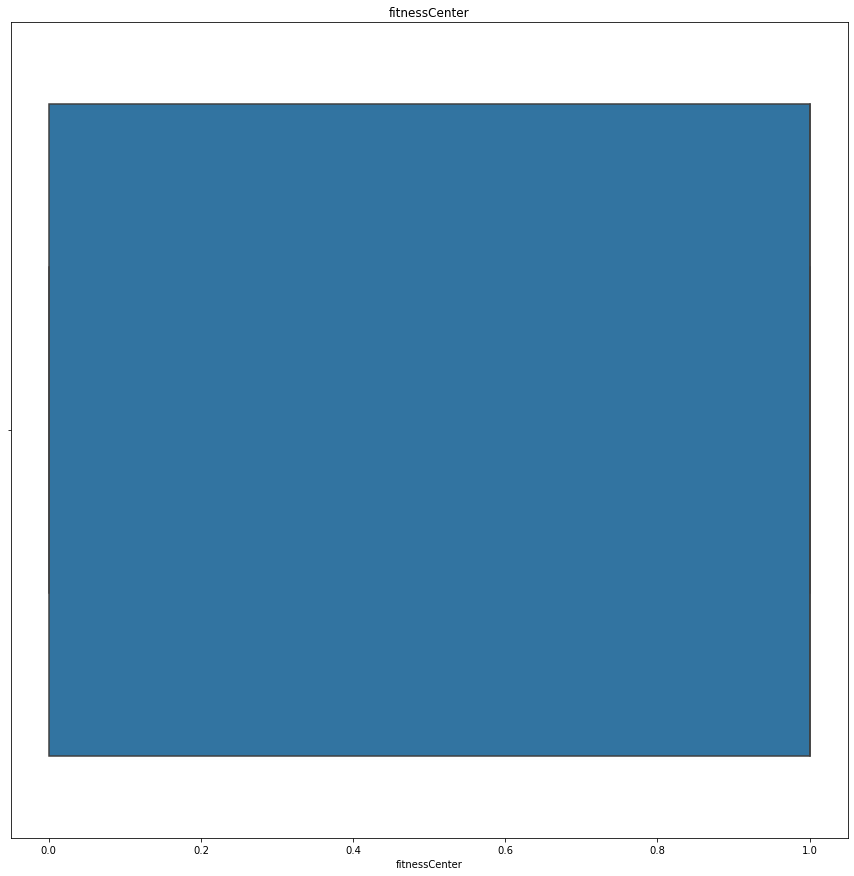

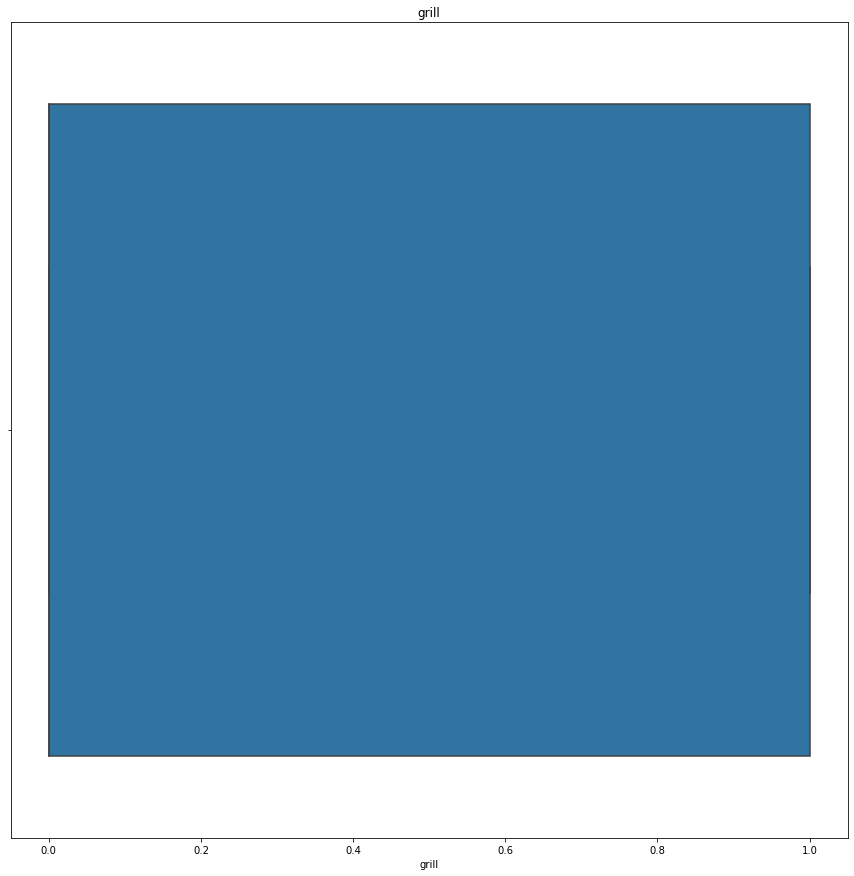

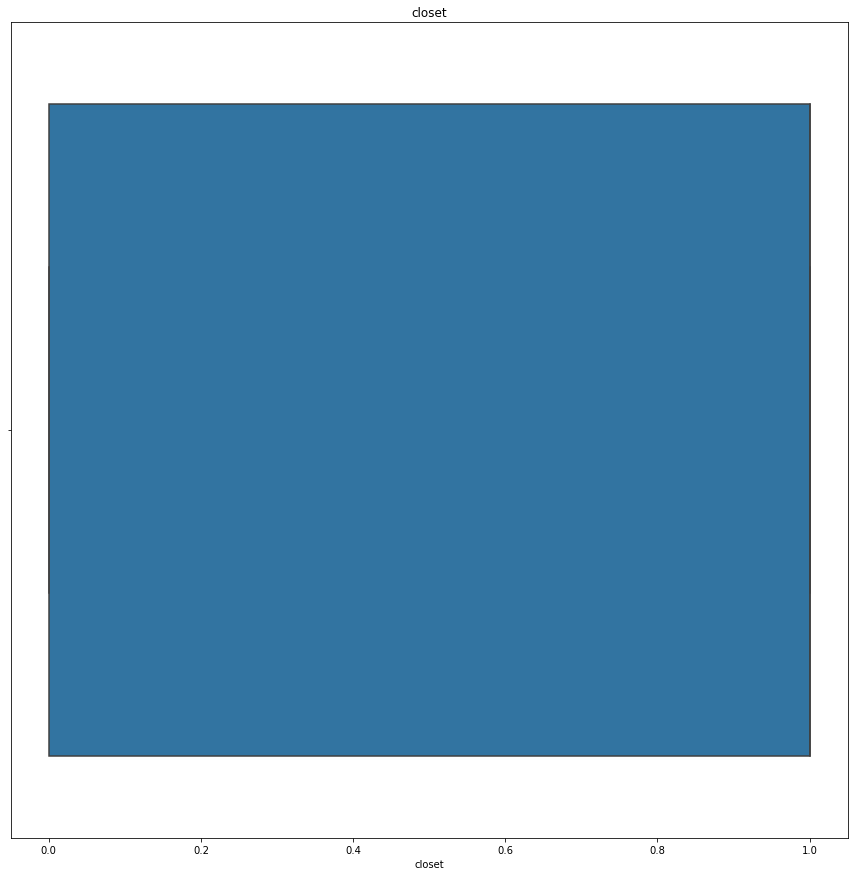

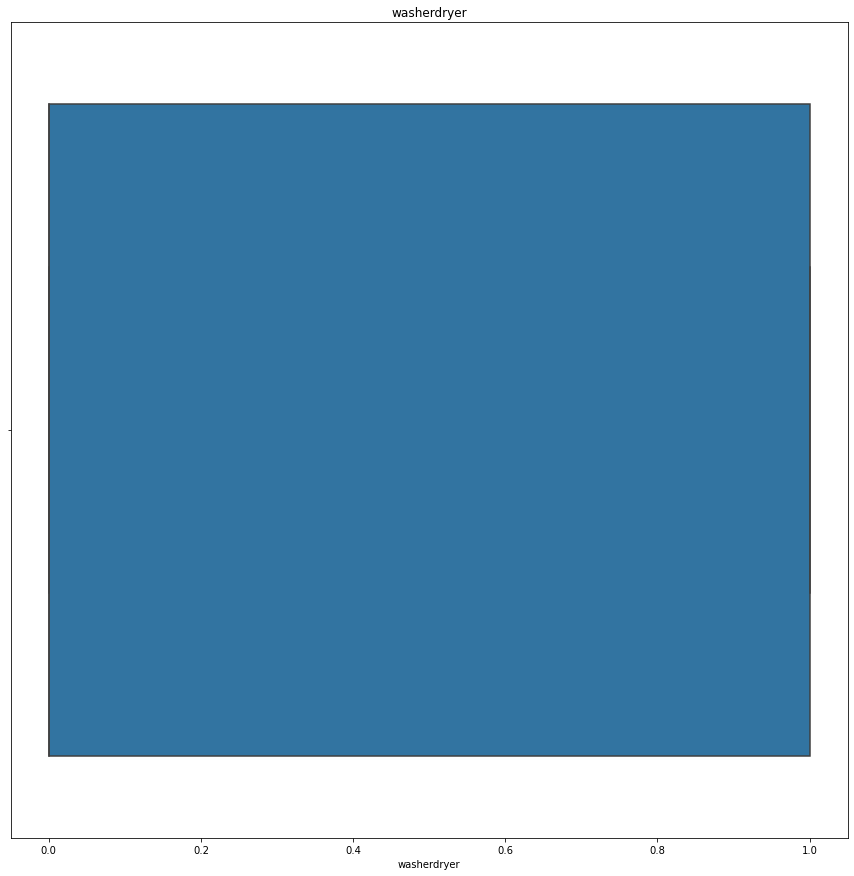

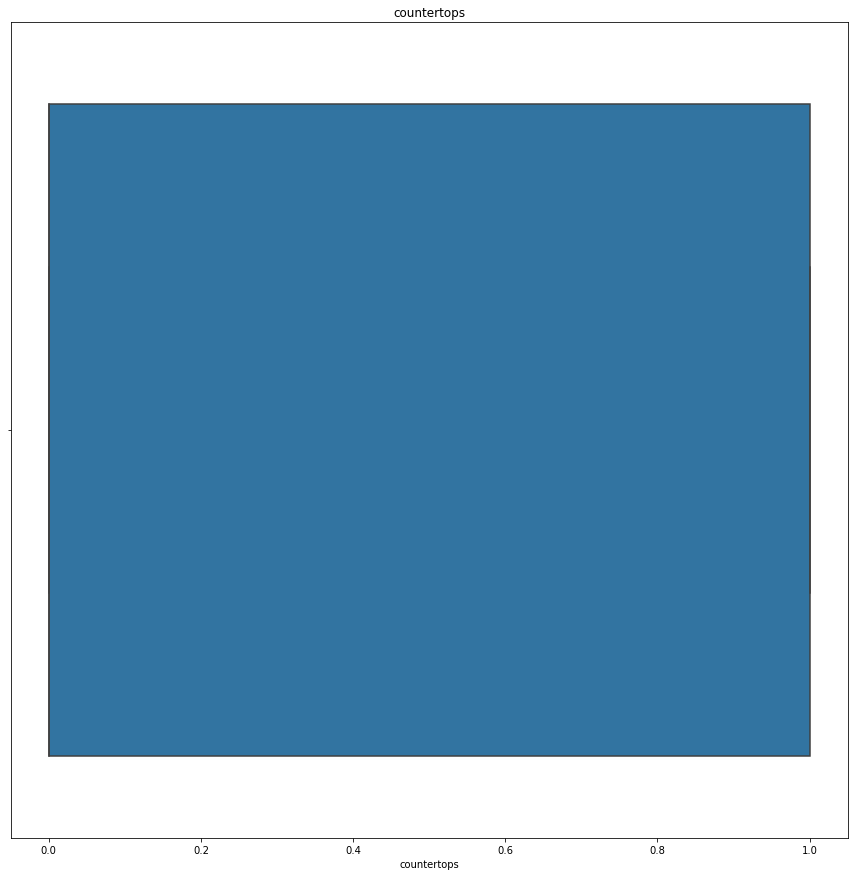

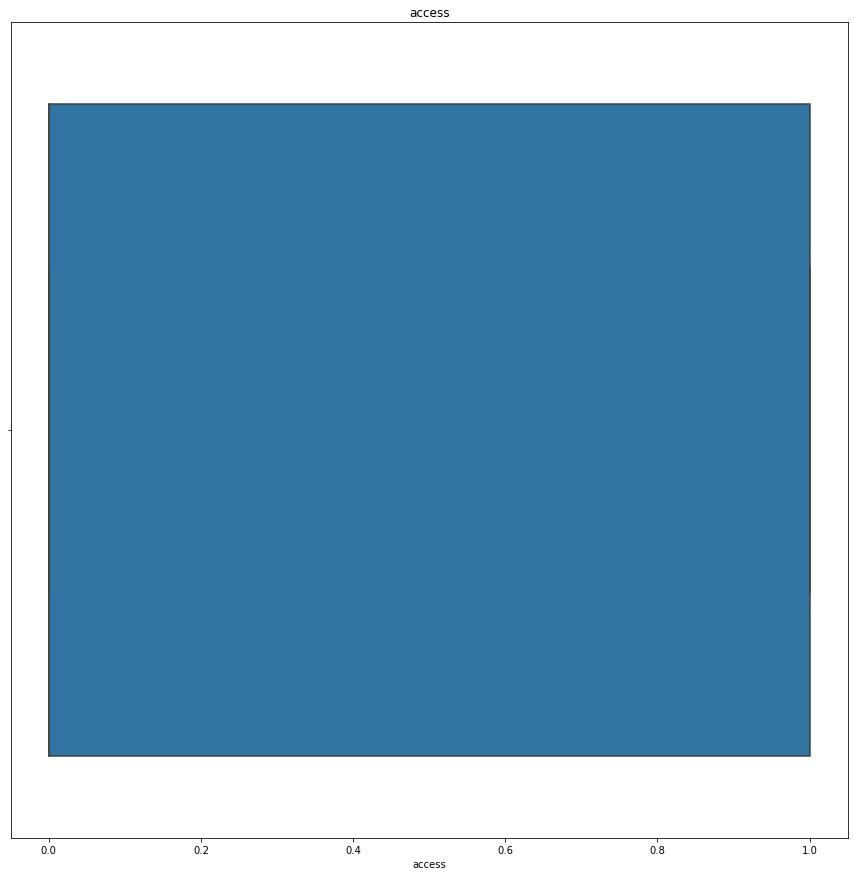

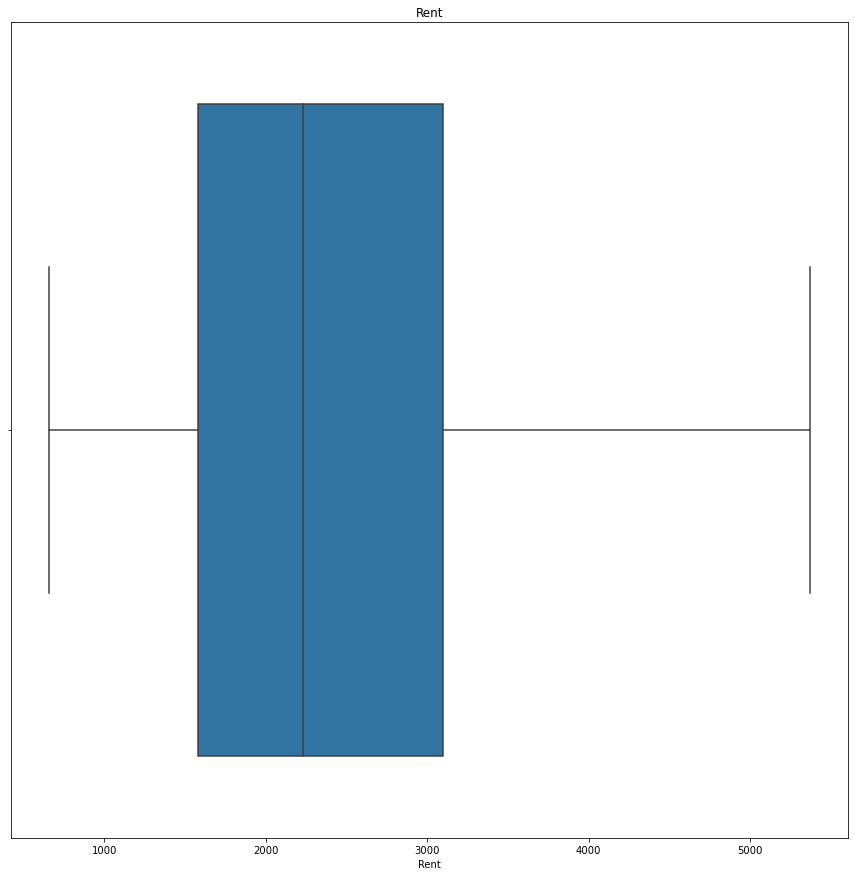

<Figure size 1080x1080 with 0 Axes>

In [326]:
for feature in df:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

Area


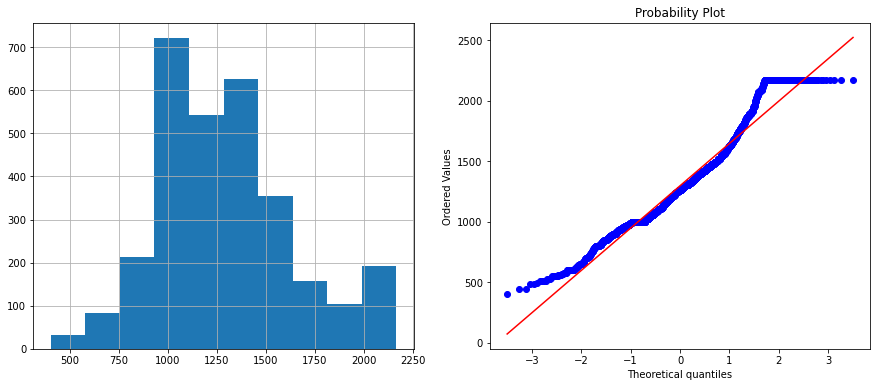

Rating


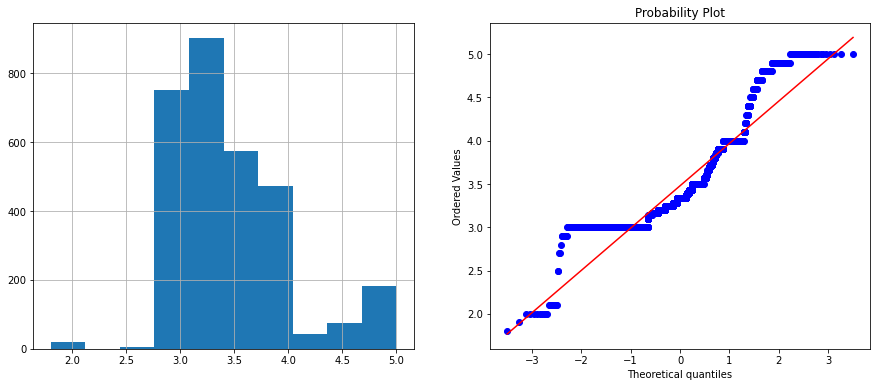

Rent


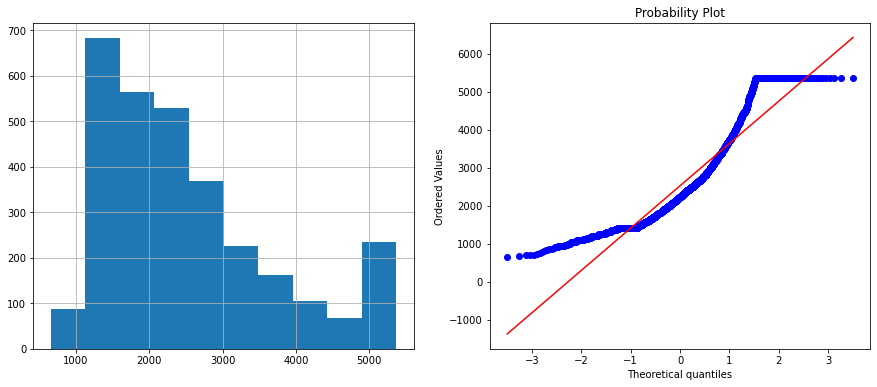

In [327]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

City


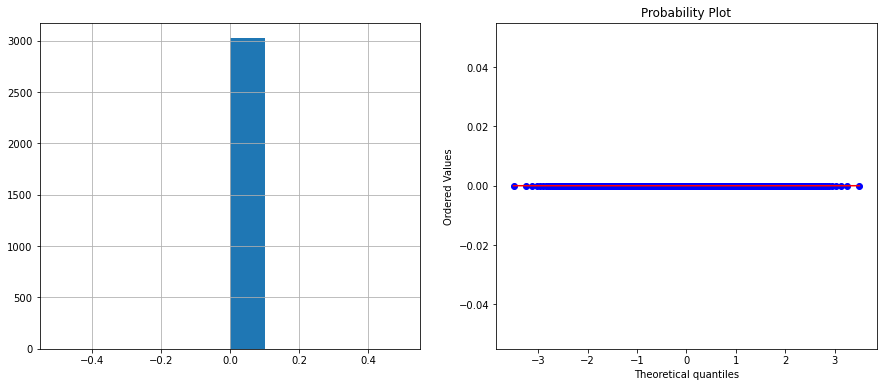

Names


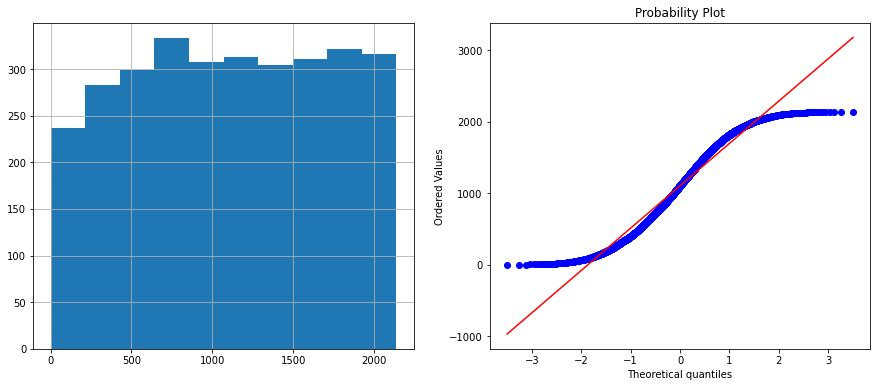

Bed


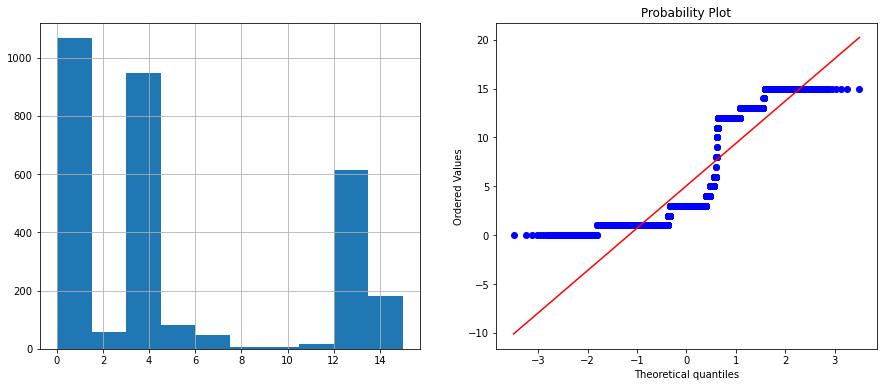

Area


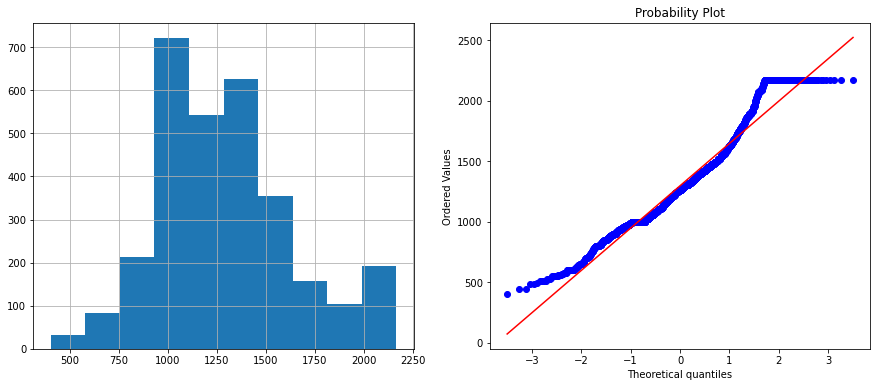

Rating


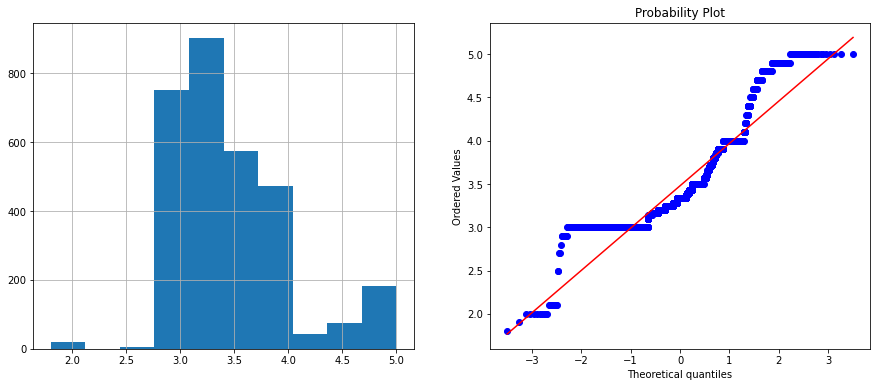

location


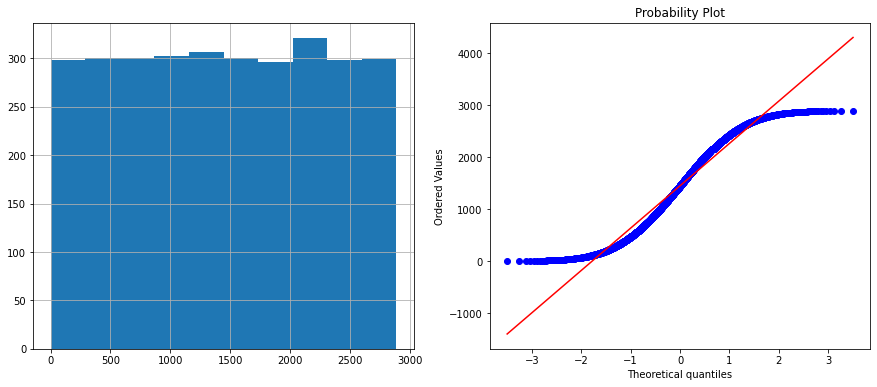

petsallowed


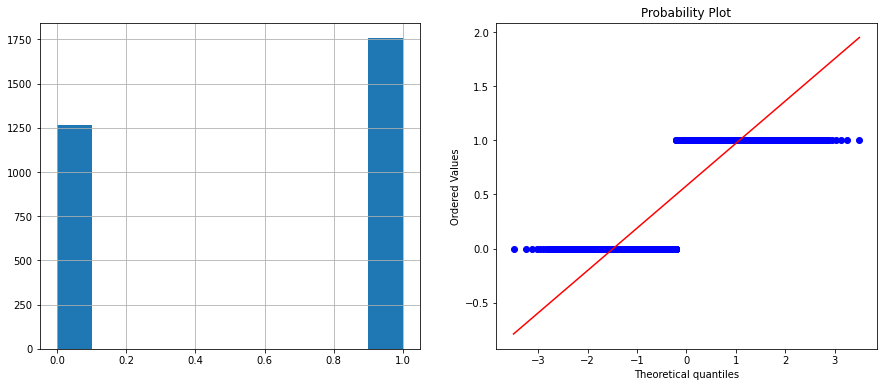

pool


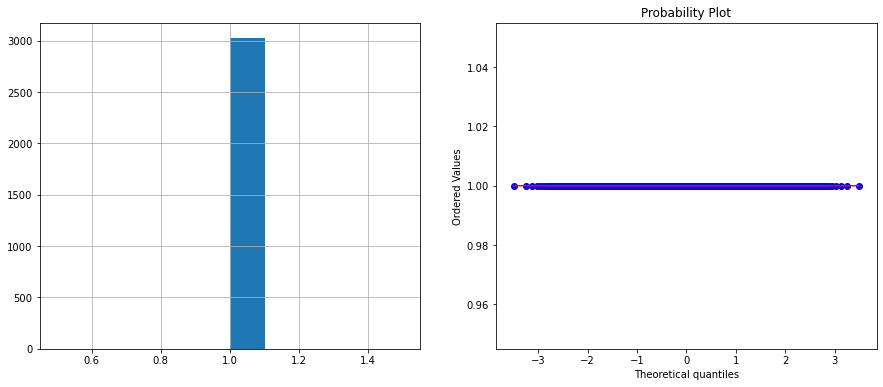

fitnessCenter


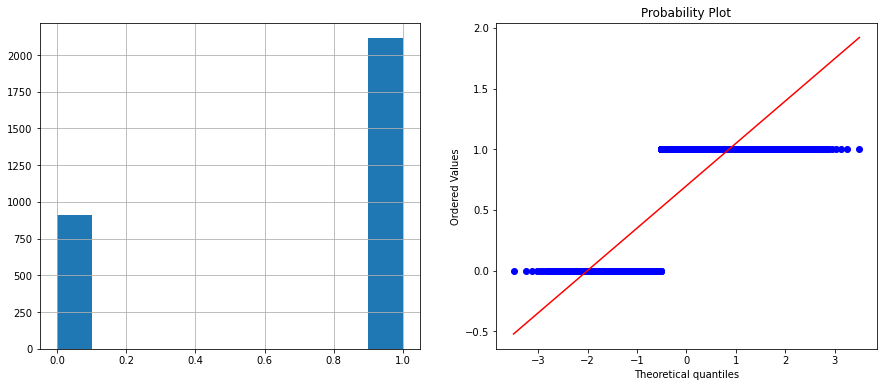

grill


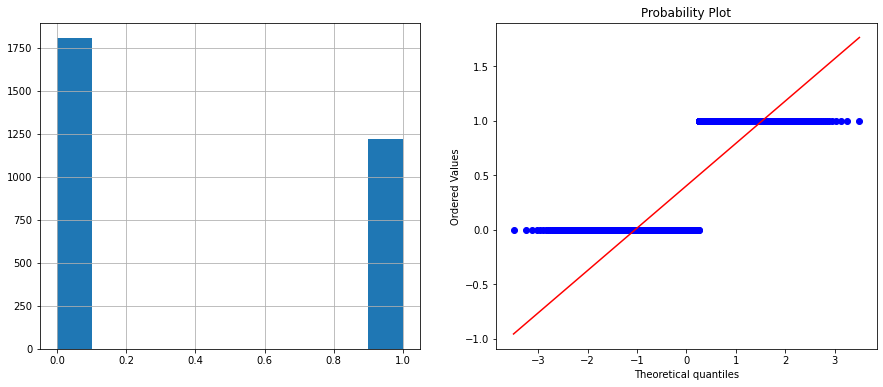

closet


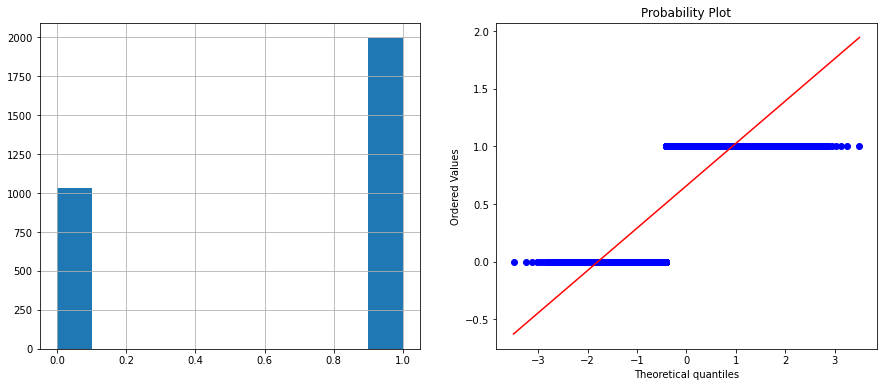

washerdryer


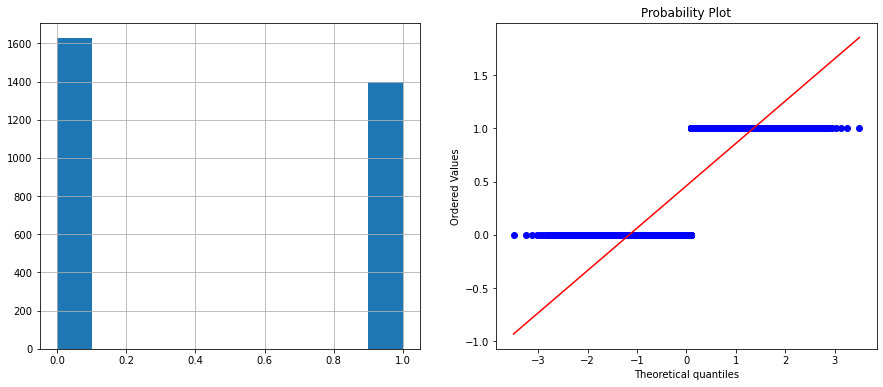

countertops


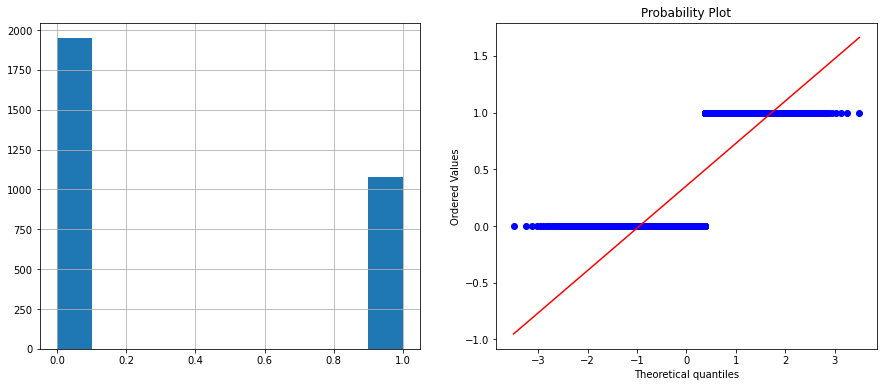

access


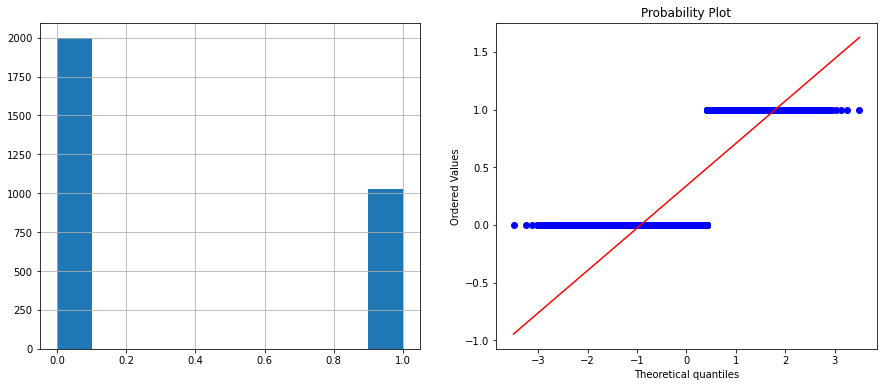

Rent


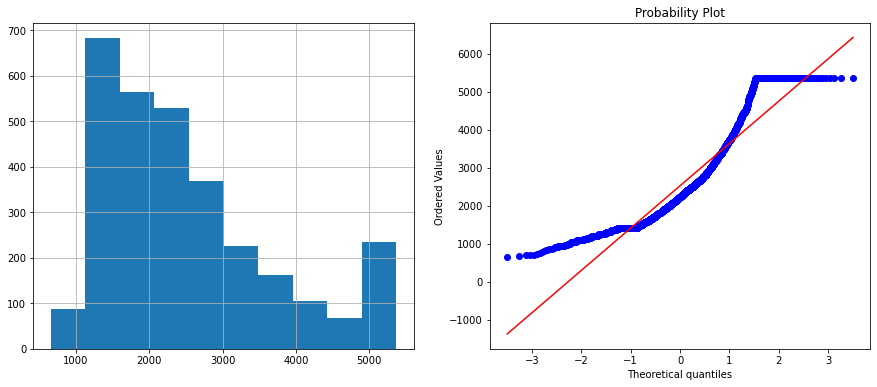

In [328]:
for feature in df:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [329]:
duplicateRows = df[df.duplicated()]

In [330]:
duplicateRows 

,City,Names,Bed,Area,Rating,location,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
197,0,238.0,6.0,2168.0,3.000000,1851,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,3295.0
220,0,291.0,4.0,2161.0,3.000000,2379,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,2645.0
259,0,192.0,9.0,2168.0,3.000000,1523,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,3200.0
50,0,726.0,3.0,1350.0,3.285714,648,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,2499.0
101,0,1516.0,2.0,575.0,3.500000,1771,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,0,438.0,12.0,1437.0,3.200000,115,0.0,1,1.0,1.0,1.0,0.0,1.0,0.0,2686.0
2047,0,550.0,1.0,981.0,3.200000,77,0.0,1,1.0,0.0,1.0,1.0,0.0,0.0,1907.0
2048,0,1326.0,3.0,1319.0,3.000000,2320,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,2149.0
2049,0,1302.0,5.0,1300.0,3.166667,1466,1.0,1,0.0,0.0,1.0,1.0,0.0,1.0,1473.0


In [331]:
df.drop_duplicates()

,City,Names,Bed,Area,Rating,location,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,0,729.0,3.0,1404.0,4.200000,448,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,2420.0
1,0,726.0,3.0,1350.0,4.000000,647,1.0,1,1.0,1.0,1.0,0.0,1.0,1.0,2499.0
2,0,753.0,3.0,1180.0,3.000000,1361,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1735.0
3,0,754.0,12.0,1177.0,4.000000,2736,1.0,1,1.0,1.0,1.0,1.0,0.0,1.0,2479.0
4,0,362.0,1.0,1317.0,3.000000,1239,1.0,1,1.0,0.0,0.0,1.0,0.0,1.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,0,954.0,3.0,1500.0,3.857143,16,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1981.0
2044,0,1553.0,3.0,1473.0,3.285714,1424,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,2370.0
2045,0,139.0,1.0,1097.0,3.142857,1745,0.0,1,1.0,1.0,0.0,0.0,1.0,1.0,3543.0
2046,0,1490.0,12.0,1303.0,3.200000,188,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,2519.0


In [332]:
df.to_csv("Rentpredictiondataset-preprocessed.csv", index=False)